In [1]:
import json
import pandas as pd
import copy
import glob
import cv2
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
sys.path.append(os.path.join('./','../pyunet'))
from lib.unet import UNet
from modules.train import Train
import torch
from lib.utils import get_image, get_mask, get_predicted_img, dice_score, count_parameters
import glob
from sklearn.model_selection import train_test_split
import shutil
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
img_dir  = "./images/covid19ctscandlmulti/images/"
mask_dir = "./images/covid19ctscandlmulti/masks/"

tmp_dir = "./tmp"

if os.path.exists(tmp_dir):
    shutil.rmtree(tmp_dir)

train_images_dir = "./tmp/train/images/"
train_masks_dir  = "./tmp/train/masks/"

test_images_dir  = "./tmp/test/images/"
test_masks_dir   = "./tmp/test/masks/"

os.makedirs(train_images_dir)
os.makedirs(train_masks_dir)
os.makedirs(test_images_dir)
os.makedirs(test_masks_dir)

images = sorted(glob.glob("{}/*".format(img_dir)))
masks  = sorted(glob.glob("{}/*".format(mask_dir)))

train_images, test_images, train_masks, test_masks = train_test_split(
    images,
    masks,
    test_size=0.3,
    random_state=42
)

for img_file in train_images:
    shutil.copy(img_file, train_images_dir)
    
for img_file in train_masks:
    shutil.copy(img_file, train_masks_dir)
    
for img_file in test_images:
    shutil.copy(img_file, test_images_dir)
    
for img_file in test_masks:
    shutil.copy(img_file, test_masks_dir)
    
    

In [3]:
img_height     = 128
img_width      = 128
device         = 'cuda'
gpu_index      = 0
input_img_dir  = train_images_dir
input_mask_dir = train_masks_dir
model_file     = "test.pth"
epochs         = 200
learning_rate  = 1e-005
in_channels    = 3
out_channels   = 4
batch_size     = 3
loss_type      = 'CE'
model_type     = 'unet_rd'

params = {
    'img_height':     img_height,
    'img_width':      img_width,
    'device':         device,
    'gpu_index':      gpu_index,
    'input_img_dir':  input_img_dir,
    'input_mask_dir': input_mask_dir,
    'epochs':         epochs,
    'learning_rate':  learning_rate,
    'in_channels':    in_channels,
    'out_channels':   out_channels,
    'loss_type':      loss_type,
    'batch_size':     batch_size,
    'model_file':     model_file,
    'test_img_dir':   test_images_dir,
    'test_mask_dir':  test_masks_dir,
    'model_type':     model_type
}

cmd = Train(params=params)

cmd.execute()

model = cmd.model

num_parameters = count_parameters(model)

print("Number of Parameters: {}".format(num_parameters))

Training model...
input_img_dir: ./tmp/train/images/
input_mask_dir: ./tmp/train/masks/
CUDA Device: NVIDIA GeForce RTX 3050 Laptop GPU
UNetRd(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): NormalizedDoubleConv(
      (first_conv): DepthwiseSeperableConv(
        (depthwise): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=1024, bias=False)
        (pointwise): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (first_norm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (first_actv): ReLU(inplace=True)
      (attention): AttentionConv2d(
        (conv): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
        (attn): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
        (sigmoid): Sigmoid()
        (relu): ReLU()
      )
      (skip_conn): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.19it/s, loss=1.32]


Ave Loss: 1.4107962052027385
Ave Accuracy: 0.7295817057291667
Ave F1: 0.300424652908626
Ave Precision: 0.32478994235804465
Ave Recall: 0.6130289737902911
Ave Specificity: 0.6130289737902911
Saving model to test.pth...
Epoch: 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.40it/s, loss=1.23]


Ave Loss: 1.2668788582086563
Ave Accuracy: 0.7601155598958333
Ave F1: 0.32013998120437626
Ave Precision: 0.33852705641707564
Ave Recall: 0.6372412435561506
Ave Specificity: 0.6372412435561506
Saving model to test.pth...
Epoch: 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.13it/s, loss=1.18]


Ave Loss: 1.1986168051759403
Ave Accuracy: 0.779388427734375
Ave F1: 0.32967966684426664
Ave Precision: 0.3437430510147069
Ave Recall: 0.650969209517567
Ave Specificity: 0.650969209517567
Saving model to test.pth...
Epoch: 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.05it/s, loss=1.12]


Ave Loss: 1.1382247830430667
Ave Accuracy: 0.7986185709635417
Ave F1: 0.3358507419384935
Ave Precision: 0.3481893575046982
Ave Recall: 0.6552731190100156
Ave Specificity: 0.6552731190100156
Saving model to test.pth...
Epoch: 4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.18it/s, loss=1.06]


Ave Loss: 1.0760639384388924
Ave Accuracy: 0.82020263671875
Ave F1: 0.34483301765340496
Ave Precision: 0.3574614948184204
Ave Recall: 0.6656482851190381
Ave Specificity: 0.6656482851190381
Saving model to test.pth...
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.56it/s, loss=0.999]


Ave Loss: 1.0181451961398125
Ave Accuracy: 0.8361897786458333
Ave F1: 0.35499350691506926
Ave Precision: 0.3698589705018479
Ave Recall: 0.6767838233941116
Ave Specificity: 0.6767838233941116
Saving model to test.pth...
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.27it/s, loss=0.951]


Ave Loss: 0.9633417998751005
Ave Accuracy: 0.846722412109375
Ave F1: 0.3615767559397059
Ave Precision: 0.37839895001323404
Ave Recall: 0.6846221094037053
Ave Specificity: 0.6846221094037053
Saving model to test.pth...
Epoch: 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.35it/s, loss=0.909]


Ave Loss: 0.9080771754185358
Ave Accuracy: 0.85389404296875
Ave F1: 0.36429086235674
Ave Precision: 0.38294617593438574
Ave Recall: 0.6879165420693767
Ave Specificity: 0.6879165420693767
Saving model to test.pth...
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.79it/s, loss=0.863]


Ave Loss: 0.8563027481238047
Ave Accuracy: 0.8584126790364583
Ave F1: 0.36520216848350856
Ave Precision: 0.3841494572374529
Ave Recall: 0.687874385688748
Ave Specificity: 0.687874385688748
Saving model to test.pth...
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.62it/s, loss=0.827]


Ave Loss: 0.8100698813796043
Ave Accuracy: 0.8569071451822917
Ave F1: 0.3654647413542555
Ave Precision: 0.38499300334423053
Ave Recall: 0.6850873800323599
Ave Specificity: 0.6850873800323599
Saving model to test.pth...
Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.43it/s, loss=0.854]


Ave Loss: 0.7742159590125084
Ave Accuracy: 0.8483133951822917
Ave F1: 0.35898348726465285
Ave Precision: 0.380552836243513
Ave Recall: 0.6756291194250614
Ave Specificity: 0.6756291194250614
Saving model to test.pth...
Epoch: 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.64it/s, loss=0.79]


Ave Loss: 0.7453488906224569
Ave Accuracy: 0.8719258626302083
Ave F1: 0.3760332535118379
Ave Precision: 0.39921641302009375
Ave Recall: 0.6955284016993301
Ave Specificity: 0.6955284016993301
Saving model to test.pth...
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.48it/s, loss=0.747]


Ave Loss: 0.717134416103363
Ave Accuracy: 0.87864990234375
Ave F1: 0.37665059028662345
Ave Precision: 0.39991452229613
Ave Recall: 0.6846756227726515
Ave Specificity: 0.6846756227726515
Saving model to test.pth...
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.48it/s, loss=0.696]


Ave Loss: 0.6718915725747744
Ave Accuracy: 0.88192138671875
Ave F1: 0.3771676263435045
Ave Precision: 0.40274180881535687
Ave Recall: 0.6866793524916968
Ave Specificity: 0.6866793524916968
Saving model to test.pth...
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.89it/s, loss=0.669]


Ave Loss: 0.6365286683042845
Ave Accuracy: 0.8816060384114583
Ave F1: 0.37671291878290875
Ave Precision: 0.4033429650972412
Ave Recall: 0.6856631708315656
Ave Specificity: 0.6856631708315656
Saving model to test.pth...
Epoch: 15


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.51it/s, loss=0.64]


Ave Loss: 0.6061017103493214
Ave Accuracy: 0.878515625
Ave F1: 0.3759619600925756
Ave Precision: 0.4032267095871253
Ave Recall: 0.682703823245079
Ave Specificity: 0.682703823245079
Saving model to test.pth...
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.33it/s, loss=0.615]


Ave Loss: 0.5810517333447933
Ave Accuracy: 0.8790730794270833
Ave F1: 0.37724198126020364
Ave Precision: 0.40579552874077895
Ave Recall: 0.679876653447739
Ave Specificity: 0.679876653447739
Saving model to test.pth...
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.76it/s, loss=0.598]


Ave Loss: 0.5587257804969946
Ave Accuracy: 0.8748799641927083
Ave F1: 0.3698853893796658
Ave Precision: 0.39965391002166645
Ave Recall: 0.670643762594904
Ave Specificity: 0.670643762594904
Saving model to test.pth...
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.64it/s, loss=0.583]


Ave Loss: 0.5423828711112341
Ave Accuracy: 0.8850118001302083
Ave F1: 0.37512922487128064
Ave Precision: 0.40743189796708046
Ave Recall: 0.676029750116124
Ave Specificity: 0.676029750116124
Saving model to test.pth...
Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.70it/s, loss=0.563]


Ave Loss: 0.5221896829704443
Ave Accuracy: 0.886663818359375
Ave F1: 0.3786349308986428
Ave Precision: 0.4122953190333403
Ave Recall: 0.6703723326906015
Ave Specificity: 0.6703723326906015
Saving model to test.pth...
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.50it/s, loss=0.536]


Ave Loss: 0.499221542229255
Ave Accuracy: 0.8852315266927083
Ave F1: 0.3786991271104792
Ave Precision: 0.4160829401275686
Ave Recall: 0.6690869969491332
Ave Specificity: 0.6690869969491332
Saving model to test.pth...
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.76it/s, loss=0.519]


Ave Loss: 0.47852949301401776
Ave Accuracy: 0.8898295084635417
Ave F1: 0.3828275233074877
Ave Precision: 0.41833527016978145
Ave Recall: 0.6759776145587041
Ave Specificity: 0.6759776145587041
Saving model to test.pth...
Epoch: 22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.67it/s, loss=0.509]


Ave Loss: 0.46180356790622074
Ave Accuracy: 0.8852518717447917
Ave F1: 0.38688567723678347
Ave Precision: 0.4205198580857787
Ave Recall: 0.6893067392613419
Ave Specificity: 0.6893067392613419
Saving model to test.pth...
Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.35it/s, loss=0.489]


Ave Loss: 0.4455578165749709
Ave Accuracy: 0.878961181640625
Ave F1: 0.38630473322980874
Ave Precision: 0.4220415878361077
Ave Recall: 0.6837947403803971
Ave Specificity: 0.6837947403803971
Saving model to test.pth...
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.49it/s, loss=0.476]


Ave Loss: 0.4299490563571453
Ave Accuracy: 0.8744873046875
Ave F1: 0.38244260455071244
Ave Precision: 0.42586423511264193
Ave Recall: 0.671501405489415
Ave Specificity: 0.671501405489415
Saving model to test.pth...
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.49it/s, loss=0.455]


Ave Loss: 0.41279567778110504
Ave Accuracy: 0.8872843424479167
Ave F1: 0.38568468843623066
Ave Precision: 0.42982625641742866
Ave Recall: 0.6717749076932589
Ave Specificity: 0.6717749076932589
Saving model to test.pth...
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.60it/s, loss=0.442]


Ave Loss: 0.39435520643989247
Ave Accuracy: 0.8907145182291667
Ave F1: 0.3863613221470333
Ave Precision: 0.4258266561990761
Ave Recall: 0.6667575925950516
Ave Specificity: 0.6667575925950516
Saving model to test.pth...
Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.59it/s, loss=0.431]


Ave Loss: 0.37788543726007146
Ave Accuracy: 0.886041259765625
Ave F1: 0.38283259234526945
Ave Precision: 0.4221022978913389
Ave Recall: 0.6626561849010465
Ave Specificity: 0.6626561849010465
Saving model to test.pth...
Epoch: 28


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.89it/s, loss=0.42]


Ave Loss: 0.36570697153608006
Ave Accuracy: 0.879791259765625
Ave F1: 0.37881115141411426
Ave Precision: 0.4190866999264117
Ave Recall: 0.6569469135338406
Ave Specificity: 0.6569469135338406
Saving model to test.pth...
Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.09it/s, loss=0.419]


Ave Loss: 0.35566019763549167
Ave Accuracy: 0.8697774251302083
Ave F1: 0.3737253051555894
Ave Precision: 0.41594582256277485
Ave Recall: 0.644910345765622
Ave Specificity: 0.644910345765622
Saving model to test.pth...
Epoch: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.61it/s, loss=0.401]


Ave Loss: 0.3464072222510974
Ave Accuracy: 0.8711018880208333
Ave F1: 0.3835455899053098
Ave Precision: 0.42859524209856886
Ave Recall: 0.6599023070048069
Ave Specificity: 0.6599023070048069
Saving model to test.pth...
Epoch: 31


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.75it/s, loss=0.382]


Ave Loss: 0.33659564703702927
Ave Accuracy: 0.902593994140625
Ave F1: 0.3992241539319573
Ave Precision: 0.44474128849199107
Ave Recall: 0.6834570802826004
Ave Specificity: 0.6834570802826004
Saving model to test.pth...
Epoch: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.50it/s, loss=0.367]


Ave Loss: 0.31965391834576923
Ave Accuracy: 0.900677490234375
Ave F1: 0.39234350490037706
Ave Precision: 0.43283968994867705
Ave Recall: 0.6699972020270377
Ave Specificity: 0.6699972020270377
Saving model to test.pth...
Epoch: 33


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.37it/s, loss=0.351]


Ave Loss: 0.30457865074276924
Ave Accuracy: 0.8923055013020833
Ave F1: 0.38623585200970484
Ave Precision: 0.4246412803071619
Ave Recall: 0.6596629921187979
Ave Specificity: 0.6596629921187979
Saving model to test.pth...
Epoch: 34


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.10it/s, loss=0.343]


Ave Loss: 0.294358029961586
Ave Accuracy: 0.8916015625
Ave F1: 0.3874734816622737
Ave Precision: 0.42633273743074157
Ave Recall: 0.6597675433250242
Ave Specificity: 0.6597675433250242
Saving model to test.pth...
Epoch: 35


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.30it/s, loss=0.34]


Ave Loss: 0.28791937542458373
Ave Accuracy: 0.9024251302083334
Ave F1: 0.3975737590415056
Ave Precision: 0.434201412058475
Ave Recall: 0.6794891178291393
Ave Specificity: 0.6794891178291393
Saving model to test.pth...
Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.70it/s, loss=0.333]


Ave Loss: 0.2824436662097772
Ave Accuracy: 0.9066507975260417
Ave F1: 0.40315285411110646
Ave Precision: 0.4491094136166312
Ave Recall: 0.6894857322386753
Ave Specificity: 0.6894857322386753
Saving model to test.pth...
Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.79it/s, loss=0.324]


Ave Loss: 0.27498334149519604
Ave Accuracy: 0.9021077473958333
Ave F1: 0.40519677299165213
Ave Precision: 0.4391741138174023
Ave Recall: 0.7016002481944237
Ave Specificity: 0.7016002481944237
Saving model to test.pth...
Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.44it/s, loss=0.312]


Ave Loss: 0.2625805977731943
Ave Accuracy: 0.9016276041666667
Ave F1: 0.40774382649861945
Ave Precision: 0.4358237481206866
Ave Recall: 0.705682303533335
Ave Specificity: 0.705682303533335
Saving model to test.pth...
Epoch: 39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.76it/s, loss=0.298]


Ave Loss: 0.2505037697652976
Ave Accuracy: 0.9040791829427083
Ave F1: 0.41094057723258465
Ave Precision: 0.4398104141361505
Ave Recall: 0.7045990759226327
Ave Specificity: 0.7045990759226327
Saving model to test.pth...
Epoch: 40


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.63it/s, loss=0.287]


Ave Loss: 0.24020384748776755
Ave Accuracy: 0.9090006510416667
Ave F1: 0.41206379248661645
Ave Precision: 0.441852254922171
Ave Recall: 0.700854085313299
Ave Specificity: 0.700854085313299
Saving model to test.pth...
Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.65it/s, loss=0.276]


Ave Loss: 0.2298711376885573
Ave Accuracy: 0.9086446126302083
Ave F1: 0.4139925844303188
Ave Precision: 0.4431825169705123
Ave Recall: 0.7037750713597977
Ave Specificity: 0.7037750713597977
Saving model to test.pth...
Epoch: 42


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.38it/s, loss=0.27]


Ave Loss: 0.22151359667380652
Ave Accuracy: 0.90767822265625
Ave F1: 0.4138231607389771
Ave Precision: 0.44494674480989943
Ave Recall: 0.7055123477009367
Ave Specificity: 0.7055123477009367
Saving model to test.pth...
Epoch: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.18it/s, loss=0.263]


Ave Loss: 0.21398239148159823
Ave Accuracy: 0.9075581868489583
Ave F1: 0.4133135078880547
Ave Precision: 0.4461776187710535
Ave Recall: 0.7055928500013836
Ave Specificity: 0.7055928500013836
Saving model to test.pth...
Epoch: 44


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.55it/s, loss=0.259]


Ave Loss: 0.2069236741711696
Ave Accuracy: 0.908807373046875
Ave F1: 0.41423139460093844
Ave Precision: 0.4437153878918052
Ave Recall: 0.7062137232534923
Ave Specificity: 0.7062137232534923
Saving model to test.pth...
Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.54it/s, loss=0.255]


Ave Loss: 0.2003469622383515
Ave Accuracy: 0.9090535481770833
Ave F1: 0.41460854480621356
Ave Precision: 0.45059552859256496
Ave Recall: 0.7078447901311352
Ave Specificity: 0.7078447901311352
Saving model to test.pth...
Epoch: 46


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.20it/s, loss=0.246]


Ave Loss: 0.19409076807399592
Ave Accuracy: 0.90950927734375
Ave F1: 0.41698248335082955
Ave Precision: 0.44941050560177204
Ave Recall: 0.7105212541077156
Ave Specificity: 0.7105212541077156
Saving model to test.pth...
Epoch: 47


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.79it/s, loss=0.235]


Ave Loss: 0.188205157717069
Ave Accuracy: 0.908721923828125
Ave F1: 0.41837435487022034
Ave Precision: 0.4454173124440419
Ave Recall: 0.7148947691630827
Ave Specificity: 0.7148947691630827
Saving model to test.pth...
Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.88it/s, loss=0.229]


Ave Loss: 0.18261534037689367
Ave Accuracy: 0.9091389973958334
Ave F1: 0.41724349093431873
Ave Precision: 0.4459992117585697
Ave Recall: 0.711635319202029
Ave Specificity: 0.711635319202029
Saving model to test.pth...
Epoch: 49


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.43it/s, loss=0.225]


Ave Loss: 0.17677357203016678
Ave Accuracy: 0.9091837565104167
Ave F1: 0.4160419824452797
Ave Precision: 0.447907696092072
Ave Recall: 0.7061999382662094
Ave Specificity: 0.7061999382662094
Saving model to test.pth...
Epoch: 50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.02it/s, loss=0.221]


Ave Loss: 0.171256090203921
Ave Accuracy: 0.909722900390625
Ave F1: 0.4159202032997446
Ave Precision: 0.4482778943832488
Ave Recall: 0.7026523581386795
Ave Specificity: 0.7026523581386795
Saving model to test.pth...
Epoch: 51


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.42it/s, loss=0.215]


Ave Loss: 0.16653979880114397
Ave Accuracy: 0.909417724609375
Ave F1: 0.41921726246570384
Ave Precision: 0.44596865291530907
Ave Recall: 0.7087035433861962
Ave Specificity: 0.7087035433861962
Saving model to test.pth...
Epoch: 52


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.31it/s, loss=0.21]


Ave Loss: 0.16179217925916115
Ave Accuracy: 0.9082194010416667
Ave F1: 0.42249710210815977
Ave Precision: 0.4412365699291822
Ave Recall: 0.7207815293615046
Ave Specificity: 0.7207815293615046
Saving model to test.pth...
Epoch: 53


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.27it/s, loss=0.203]


Ave Loss: 0.15715986769646406
Ave Accuracy: 0.9075541178385417
Ave F1: 0.4211565460669297
Ave Precision: 0.4395056189181606
Ave Recall: 0.7206122244930556
Ave Specificity: 0.7206122244930556
Saving model to test.pth...
Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.74it/s, loss=0.202]


Ave Loss: 0.152742107398808
Ave Accuracy: 0.9120707194010417
Ave F1: 0.42077305477723387
Ave Precision: 0.4552150373915988
Ave Recall: 0.7066223603706209
Ave Specificity: 0.7066223603706209
Saving model to test.pth...
Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.70it/s, loss=0.198]


Ave Loss: 0.14711886116613945
Ave Accuracy: 0.9122823079427084
Ave F1: 0.41083802200686265
Ave Precision: 0.4584534637348166
Ave Recall: 0.6861737254644527
Ave Specificity: 0.6861737254644527
Saving model to test.pth...
Epoch: 56


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.60it/s, loss=0.187]


Ave Loss: 0.14432038956632218
Ave Accuracy: 0.9149983723958334
Ave F1: 0.42285098686270844
Ave Precision: 0.4507173999028192
Ave Recall: 0.6966038006570511
Ave Specificity: 0.6985471417983756
Saving model to test.pth...
Epoch: 57


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.40it/s, loss=0.181]


Ave Loss: 0.1388436627263824
Ave Accuracy: 0.9108317057291667
Ave F1: 0.4203829251414508
Ave Precision: 0.43766406083724535
Ave Recall: 0.714046459841896
Ave Specificity: 0.714046459841896
Saving model to test.pth...
Epoch: 58


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.37it/s, loss=0.178]


Ave Loss: 0.13439591228961945
Ave Accuracy: 0.9122517903645834
Ave F1: 0.42000422471033694
Ave Precision: 0.44280830722083564
Ave Recall: 0.7076588572274135
Ave Specificity: 0.7076588572274135
Saving model to test.pth...
Epoch: 59


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.54it/s, loss=0.174]


Ave Loss: 0.13017452663431564
Ave Accuracy: 0.9133402506510416
Ave F1: 0.41433626935029216
Ave Precision: 0.4573626714749548
Ave Recall: 0.6858629560358042
Ave Specificity: 0.6884358023315346
Saving model to test.pth...
Epoch: 60


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.18it/s, loss=0.172]


Ave Loss: 0.12585687482108673
Ave Accuracy: 0.9142293294270833
Ave F1: 0.41490070450415606
Ave Precision: 0.45452179937307274
Ave Recall: 0.6816043764844868
Ave Specificity: 0.6838709571500897
Saving model to test.pth...
Epoch: 61


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.76it/s, loss=0.168]


Ave Loss: 0.12254946151127417
Ave Accuracy: 0.914093017578125
Ave F1: 0.42525881853648334
Ave Precision: 0.4639904267699428
Ave Recall: 0.6963012428129898
Ave Specificity: 0.6983023467666266
Saving model to test.pth...
Epoch: 62


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.68it/s, loss=0.165]


Ave Loss: 0.11809757879624765
Ave Accuracy: 0.9140055338541667
Ave F1: 0.41942771946666546
Ave Precision: 0.4462785275689664
Ave Recall: 0.705462794954308
Ave Specificity: 0.705462794954308
Saving model to test.pth...
Epoch: 63


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.98it/s, loss=0.163]


Ave Loss: 0.11480760977913936
Ave Accuracy: 0.9154276529947917
Ave F1: 0.4147744293869972
Ave Precision: 0.4398617395065566
Ave Recall: 0.6937058389322301
Ave Specificity: 0.6937058389322301
Saving model to test.pth...
Epoch: 64


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.37it/s, loss=0.162]


Ave Loss: 0.11160217908521493
Ave Accuracy: 0.9137349446614583
Ave F1: 0.40568351273957526
Ave Precision: 0.4637693282430258
Ave Recall: 0.6717271082787459
Ave Specificity: 0.6754550869941933
Saving model to test.pth...
Epoch: 65


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.54it/s, loss=0.154]


Ave Loss: 0.110038038653632
Ave Accuracy: 0.9140787760416667
Ave F1: 0.41653855880362867
Ave Precision: 0.4525015109414058
Ave Recall: 0.6957597451211757
Ave Specificity: 0.6957597451211757
Saving model to test.pth...
Epoch: 66


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.42it/s, loss=0.148]


Ave Loss: 0.10803219769150019
Ave Accuracy: 0.913348388671875
Ave F1: 0.42605375779979204
Ave Precision: 0.44992173089576953
Ave Recall: 0.7124649641023557
Ave Specificity: 0.7124649641023557
Saving model to test.pth...
Epoch: 67


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.59it/s, loss=0.149]


Ave Loss: 0.10543772702415784
Ave Accuracy: 0.9119913736979167
Ave F1: 0.41865015735378736
Ave Precision: 0.46492066218307837
Ave Recall: 0.6926517778076502
Ave Specificity: 0.6973514220364251
Saving model to test.pth...
Epoch: 68


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.79it/s, loss=0.145]


Ave Loss: 0.10337067333360513
Ave Accuracy: 0.9128316243489584
Ave F1: 0.4155316271447907
Ave Precision: 0.46158219542314716
Ave Recall: 0.6872211274625855
Ave Specificity: 0.6912987619833336
Saving model to test.pth...
Epoch: 69


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.32it/s, loss=0.146]


Ave Loss: 0.10142156761139631
Ave Accuracy: 0.9111490885416667
Ave F1: 0.41313909429678974
Ave Precision: 0.46885688101457396
Ave Recall: 0.6767691569969171
Ave Specificity: 0.6824739676113313
Saving model to test.pth...
Epoch: 70


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.86it/s, loss=0.144]


Ave Loss: 0.10175277013331652
Ave Accuracy: 0.9101236979166667
Ave F1: 0.4076897661644659
Ave Precision: 0.4593997516255729
Ave Recall: 0.674002229354882
Ave Specificity: 0.679848182833512
Saving model to test.pth...
Epoch: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.22it/s, loss=0.139]


Ave Loss: 0.100190419703722
Ave Accuracy: 0.907354736328125
Ave F1: 0.40220888139811806
Ave Precision: 0.4497458270778879
Ave Recall: 0.6657646929286065
Ave Specificity: 0.6751572539611076
Saving model to test.pth...
Epoch: 72


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.04it/s, loss=0.133]


Ave Loss: 0.09869907951603334
Ave Accuracy: 0.9103597005208334
Ave F1: 0.39250365658260183
Ave Precision: 0.4520915347974205
Ave Recall: 0.6621401377110353
Ave Specificity: 0.6656179862293309
Saving model to test.pth...
Epoch: 73


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.33it/s, loss=0.133]


Ave Loss: 0.09698600259919961
Ave Accuracy: 0.9159871419270833
Ave F1: 0.41502033322338927
Ave Precision: 0.4928312910010114
Ave Recall: 0.6519137599505638
Ave Specificity: 0.6640056763220383
Saving model to test.pth...
Epoch: 74


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.96it/s, loss=0.132]


Ave Loss: 0.09339893469586968
Ave Accuracy: 0.91585693359375
Ave F1: 0.41561119932114676
Ave Precision: 0.49950700569346157
Ave Recall: 0.6317829826310501
Ave Specificity: 0.6501118718904337
Saving model to test.pth...
Epoch: 75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.92it/s, loss=0.123]


Ave Loss: 0.09028614033013582
Ave Accuracy: 0.911907958984375
Ave F1: 0.4053929446104387
Ave Precision: 0.4738085227818133
Ave Recall: 0.6417306725382841
Ave Specificity: 0.6544169156709221
Saving model to test.pth...
Epoch: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.10it/s, loss=0.126]


Ave Loss: 0.09092764028658469
Ave Accuracy: 0.9143941243489583
Ave F1: 0.3947216374069027
Ave Precision: 0.47726138883243585
Ave Recall: 0.6466432793430184
Ave Specificity: 0.6549832848828732
Saving model to test.pth...
Epoch: 77


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.18it/s, loss=0.123]


Ave Loss: 0.08699774943913023
Ave Accuracy: 0.9129292805989583
Ave F1: 0.3921625184110582
Ave Precision: 0.4649332399830191
Ave Recall: 0.6399980766699954
Ave Specificity: 0.6500370851179488
Saving model to test.pth...
Epoch: 78


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.30it/s, loss=0.117]


Ave Loss: 0.08455916571741302
Ave Accuracy: 0.9138041178385417
Ave F1: 0.4102712130644781
Ave Precision: 0.47072062901182726
Ave Recall: 0.6823809370230821
Ave Specificity: 0.6855593648981078
Saving model to test.pth...
Epoch: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.83it/s, loss=0.114]


Ave Loss: 0.08057930025582512
Ave Accuracy: 0.911651611328125
Ave F1: 0.4250005017108556
Ave Precision: 0.4789114444736441
Ave Recall: 0.7006600264892452
Ave Specificity: 0.7036352308931793
Saving model to test.pth...
Epoch: 80


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.83it/s, loss=0.11]


Ave Loss: 0.07786931687345107
Ave Accuracy: 0.9126505533854167
Ave F1: 0.43347690956801926
Ave Precision: 0.46405257432706326
Ave Recall: 0.707334894452346
Ave Specificity: 0.7113237757278841
Saving model to test.pth...
Epoch: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.77it/s, loss=0.105]


Ave Loss: 0.074620695784688
Ave Accuracy: 0.9151774088541667
Ave F1: 0.43447351506981186
Ave Precision: 0.4641262534501715
Ave Recall: 0.7097492516900352
Ave Specificity: 0.7138005351541256
Saving model to test.pth...
Epoch: 82


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.16it/s, loss=0.105]


Ave Loss: 0.07378273379678528
Ave Accuracy: 0.9156880696614583
Ave F1: 0.4339496692041406
Ave Precision: 0.4573763946188035
Ave Recall: 0.7087845294416557
Ave Specificity: 0.7128711879393212
Saving model to test.pth...
Epoch: 83


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.22it/s, loss=0.103]


Ave Loss: 0.0724700562035044
Ave Accuracy: 0.9172770182291666
Ave F1: 0.41850732289289017
Ave Precision: 0.45457126302025913
Ave Recall: 0.6905825911030398
Ave Specificity: 0.6923343388752322
Saving model to test.pth...
Epoch: 84


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.76it/s, loss=0.103]


Ave Loss: 0.0723413488206764
Ave Accuracy: 0.92178955078125
Ave F1: 0.4216304974948512
Ave Precision: 0.45331182981548535
Ave Recall: 0.689218207044487
Ave Specificity: 0.6908375743417567
Saving model to test.pth...
Epoch: 85


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.45it/s, loss=0.105]


Ave Loss: 0.07060355165352424
Ave Accuracy: 0.9218648274739584
Ave F1: 0.423130958793508
Ave Precision: 0.4584036793961554
Ave Recall: 0.6859639609839789
Ave Specificity: 0.6874337077066213
Saving model to test.pth...
Epoch: 86


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.56it/s, loss=0.0992]


Ave Loss: 0.07022107547769944
Ave Accuracy: 0.9174662272135417
Ave F1: 0.43252303287848154
Ave Precision: 0.46777401632971977
Ave Recall: 0.7030367551430922
Ave Specificity: 0.7071742457087565
Saving model to test.pth...
Epoch: 87


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.35it/s, loss=0.102]


Ave Loss: 0.06993091866994898
Ave Accuracy: 0.9160420735677083
Ave F1: 0.4152659847859407
Ave Precision: 0.4725813738947756
Ave Recall: 0.6870103621668324
Ave Specificity: 0.6882406229823328
Saving model to test.pth...
Epoch: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.99it/s, loss=0.103]


Ave Loss: 0.06864808173850179
Ave Accuracy: 0.9124348958333334
Ave F1: 0.41028041293771383
Ave Precision: 0.49498595708021625
Ave Recall: 0.6408617682736473
Ave Specificity: 0.6575523366760706
Saving model to test.pth...
Epoch: 89


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.32it/s, loss=0.0938]


Ave Loss: 0.0672153290361166
Ave Accuracy: 0.9135945638020834
Ave F1: 0.4230879081825229
Ave Precision: 0.5010983030278063
Ave Recall: 0.6499053176393557
Ave Specificity: 0.6694949032676913
Saving model to test.pth...
Epoch: 90


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.39it/s, loss=0.0879]


Ave Loss: 0.06518790824338794
Ave Accuracy: 0.9158976236979167
Ave F1: 0.41568263827045404
Ave Precision: 0.47799985203208656
Ave Recall: 0.6715193730792297
Ave Specificity: 0.6785502843919993
Saving model to test.pth...
Epoch: 91


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.51it/s, loss=0.0896]


Ave Loss: 0.06342852115631104
Ave Accuracy: 0.9199117024739584
Ave F1: 0.416639063388655
Ave Precision: 0.47842755727512826
Ave Recall: 0.6700270682179087
Ave Specificity: 0.6742730240076366
Saving model to test.pth...
Epoch: 92


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.42it/s, loss=0.0867]


Ave Loss: 0.06073297560214996
Ave Accuracy: 0.9201863606770834
Ave F1: 0.41869662354730447
Ave Precision: 0.47818199618850965
Ave Recall: 0.6641202039777098
Ave Specificity: 0.667963436324112
Saving model to test.pth...
Epoch: 93


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.25it/s, loss=0.0824]


Ave Loss: 0.060377675419052444
Ave Accuracy: 0.9190104166666667
Ave F1: 0.41790127581901526
Ave Precision: 0.4664350065955952
Ave Recall: 0.6851456007579586
Ave Specificity: 0.6864610330706185
Saving model to test.pth...
Epoch: 94


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.82it/s, loss=0.0826]


Ave Loss: 0.05922295975809296
Ave Accuracy: 0.9158650716145833
Ave F1: 0.422834269486231
Ave Precision: 0.46988768460428776
Ave Recall: 0.6946784012557929
Ave Specificity: 0.6986445041932635
Saving model to test.pth...
Epoch: 95


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.53it/s, loss=0.0788]


Ave Loss: 0.05771709435308973
Ave Accuracy: 0.9152689615885417
Ave F1: 0.42650426052370877
Ave Precision: 0.4586246110354618
Ave Recall: 0.7004880809528974
Ave Specificity: 0.7044863338840549
Saving model to test.pth...
Epoch: 96


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.59it/s, loss=0.0767]


Ave Loss: 0.05699407650778691
Ave Accuracy: 0.9192626953125
Ave F1: 0.42948452363665307
Ave Precision: 0.454996329526152
Ave Recall: 0.7058036535388778
Ave Specificity: 0.7070950498586435
Saving model to test.pth...
Epoch: 97


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.50it/s, loss=0.0759]


Ave Loss: 0.05520187271758914
Ave Accuracy: 0.919805908203125
Ave F1: 0.4262293519020687
Ave Precision: 0.45969121649891453
Ave Recall: 0.6982592725448684
Ave Specificity: 0.69970446602049
Saving model to test.pth...
Epoch: 98


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.11it/s, loss=0.0728]


Ave Loss: 0.053675195357451834
Ave Accuracy: 0.9207906087239583
Ave F1: 0.42786553819547124
Ave Precision: 0.4593099457615139
Ave Recall: 0.693552467961816
Ave Specificity: 0.6950368464859785
Saving model to test.pth...
Epoch: 99


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.58it/s, loss=0.0727]


Ave Loss: 0.053245089327295624
Ave Accuracy: 0.9213358561197916
Ave F1: 0.43083214680253
Ave Precision: 0.4729085996489099
Ave Recall: 0.6865026176046203
Ave Specificity: 0.6894973829279256
Saving model to test.pth...
Epoch: 100


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.70it/s, loss=0.0722]


Ave Loss: 0.051966335624456406
Ave Accuracy: 0.9189839680989583
Ave F1: 0.4233108001845318
Ave Precision: 0.4779869262427324
Ave Recall: 0.6812677562004245
Ave Specificity: 0.6844613540697364
Saving model to test.pth...
Epoch: 101


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.62it/s, loss=0.0717]


Ave Loss: 0.0509610545511047
Ave Accuracy: 0.9165751139322916
Ave F1: 0.41240321099462945
Ave Precision: 0.47908391271807116
Ave Recall: 0.6778868533223077
Ave Specificity: 0.6818474044772256
Saving model to test.pth...
Epoch: 102


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.49it/s, loss=0.0704]


Ave Loss: 0.050487559754401445
Ave Accuracy: 0.9162760416666667
Ave F1: 0.4134596220724281
Ave Precision: 0.5004921008321108
Ave Recall: 0.6501441355387032
Ave Specificity: 0.663671197049508
Saving model to test.pth...
Epoch: 103


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.98it/s, loss=0.0671]


Ave Loss: 0.05020159079382817
Ave Accuracy: 0.9189921061197917
Ave F1: 0.40540394751879616
Ave Precision: 0.49871720240995077
Ave Recall: 0.6197623218207341
Ave Specificity: 0.6374233303000091
Saving model to test.pth...
Epoch: 104


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.21it/s, loss=0.0721]


Ave Loss: 0.050312912402053676
Ave Accuracy: 0.920037841796875
Ave F1: 0.4093256485023749
Ave Precision: 0.505972739699897
Ave Recall: 0.6104985501334459
Ave Specificity: 0.6344872345470164
Saving model to test.pth...
Epoch: 105


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.75it/s, loss=0.0745]


Ave Loss: 0.04985093247766296
Ave Accuracy: 0.9186482747395833
Ave F1: 0.4043570932057386
Ave Precision: 0.4881475635250885
Ave Recall: 0.6338635984120687
Ave Specificity: 0.6442787938481146
Saving model to test.pth...
Epoch: 106


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.80it/s, loss=0.0737]


Ave Loss: 0.05110406704867879
Ave Accuracy: 0.9192911783854166
Ave F1: 0.4226739919244011
Ave Precision: 0.4916510866070579
Ave Recall: 0.669571623019366
Ave Specificity: 0.6743168630940867
Saving model to test.pth...
Epoch: 107


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.13it/s, loss=0.0729]


Ave Loss: 0.0516599629384776
Ave Accuracy: 0.914154052734375
Ave F1: 0.43062286669333455
Ave Precision: 0.47080988110825817
Ave Recall: 0.6976402333674392
Ave Specificity: 0.7008446041799502
Saving model to test.pth...
Epoch: 108


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.42it/s, loss=0.0664]


Ave Loss: 0.050342841229091086
Ave Accuracy: 0.914434814453125
Ave F1: 0.43108234832490794
Ave Precision: 0.4455170893768665
Ave Recall: 0.7194612537807082
Ave Specificity: 0.7207512615779896
Saving model to test.pth...
Epoch: 109


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.08it/s, loss=0.0653]


Ave Loss: 0.052299406534681715
Ave Accuracy: 0.9188130696614584
Ave F1: 0.42504265838556693
Ave Precision: 0.4430424798211623
Ave Recall: 0.7066118881930418
Ave Specificity: 0.7082943105384075
Saving model to test.pth...
Epoch: 110


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.70it/s, loss=0.0661]


Ave Loss: 0.050977802680184446
Ave Accuracy: 0.9222188313802083
Ave F1: 0.42285124009815195
Ave Precision: 0.46787031855276257
Ave Recall: 0.6782275558038078
Ave Specificity: 0.6796894638646757
Saving model to test.pth...
Epoch: 111


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.26it/s, loss=0.0661]


Ave Loss: 0.0489182371335725
Ave Accuracy: 0.9196248372395833
Ave F1: 0.41963340520559494
Ave Precision: 0.49292219575032703
Ave Recall: 0.6484394745625168
Ave Specificity: 0.6583254814929363
Saving model to test.pth...
Epoch: 112


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.83it/s, loss=0.0604]


Ave Loss: 0.04656160995364189
Ave Accuracy: 0.915740966796875
Ave F1: 0.4131792152375729
Ave Precision: 0.49239109270449954
Ave Recall: 0.6683932855803134
Ave Specificity: 0.6751634881966534
Saving model to test.pth...
Epoch: 113


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.97it/s, loss=0.0566]


Ave Loss: 0.04503962304443121
Ave Accuracy: 0.9165323893229167
Ave F1: 0.41322482623256046
Ave Precision: 0.4666307075432602
Ave Recall: 0.6796342329071432
Ave Specificity: 0.6849055719233222
Saving model to test.pth...
Epoch: 114


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.93it/s, loss=0.0539]


Ave Loss: 0.0430408240451167
Ave Accuracy: 0.9198140462239583
Ave F1: 0.42359077079101454
Ave Precision: 0.4613028291785139
Ave Recall: 0.6816413925235615
Ave Specificity: 0.6854965738230205
Saving model to test.pth...
Epoch: 115


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.43it/s, loss=0.0541]


Ave Loss: 0.04190076546122631
Ave Accuracy: 0.9219706217447917
Ave F1: 0.4272528635756783
Ave Precision: 0.45827531347352485
Ave Recall: 0.6946016868888217
Ave Specificity: 0.6959878303973485
Saving model to test.pth...
Epoch: 116


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.00it/s, loss=0.0527]


Ave Loss: 0.040015812730416656
Ave Accuracy: 0.9193827311197916
Ave F1: 0.4255475988007598
Ave Precision: 0.4652992814998994
Ave Recall: 0.6969439872581343
Ave Specificity: 0.6982444392619311
Saving model to test.pth...
Epoch: 117


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.07it/s, loss=0.0502]


Ave Loss: 0.03955563623458147
Ave Accuracy: 0.9201192220052083
Ave F1: 0.4289986035975161
Ave Precision: 0.4811150257093642
Ave Recall: 0.6861371169046521
Ave Specificity: 0.6888454677987639
Saving model to test.pth...
Epoch: 118


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.95it/s, loss=0.0488]


Ave Loss: 0.0378982403781265
Ave Accuracy: 0.9204935709635417
Ave F1: 0.42000139106013396
Ave Precision: 0.48325412517395894
Ave Recall: 0.667537653071446
Ave Specificity: 0.6722666750345115
Saving model to test.pth...
Epoch: 119


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.51it/s, loss=0.0488]


Ave Loss: 0.037806828739121556
Ave Accuracy: 0.919805908203125
Ave F1: 0.4369118870003704
Ave Precision: 0.4800213210046503
Ave Recall: 0.6724532081318524
Ave Specificity: 0.6834833202894363
Saving model to test.pth...
Epoch: 120


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.98it/s, loss=0.046]


Ave Loss: 0.03640419656100372
Ave Accuracy: 0.919927978515625
Ave F1: 0.4278186113437482
Ave Precision: 0.4670908841684878
Ave Recall: 0.6893315902249441
Ave Specificity: 0.694271596329988
Saving model to test.pth...
Epoch: 121


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.40it/s, loss=0.0473]


Ave Loss: 0.03624078220066925
Ave Accuracy: 0.9225118001302083
Ave F1: 0.4254173193163419
Ave Precision: 0.47018785253995937
Ave Recall: 0.6847253087492572
Ave Specificity: 0.6861191139124431
Saving model to test.pth...
Epoch: 122


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.52it/s, loss=0.0453]


Ave Loss: 0.035260813465962805
Ave Accuracy: 0.9225972493489584
Ave F1: 0.4285303645143725
Ave Precision: 0.4872786628369578
Ave Recall: 0.6774022273198682
Ave Specificity: 0.6821322534838569
Saving model to test.pth...
Epoch: 123


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.58it/s, loss=0.0443]


Ave Loss: 0.03490001770357291
Ave Accuracy: 0.9195088704427083
Ave F1: 0.426703396066264
Ave Precision: 0.4822579857741042
Ave Recall: 0.6892058018919798
Ave Specificity: 0.6936505448249091
Saving model to test.pth...
Epoch: 124


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.55it/s, loss=0.0433]


Ave Loss: 0.034244443057104945
Ave Accuracy: 0.9181925455729166
Ave F1: 0.43414089034537656
Ave Precision: 0.4780462661413927
Ave Recall: 0.6918801071571302
Ave Specificity: 0.6979200475640411
Saving model to test.pth...
Epoch: 125


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.73it/s, loss=0.0431]


Ave Loss: 0.03389226784929633
Ave Accuracy: 0.92083740234375
Ave F1: 0.43202008583059065
Ave Precision: 0.47250194529183165
Ave Recall: 0.6916188438331649
Ave Specificity: 0.6944348026018952
Saving model to test.pth...
Epoch: 126


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.69it/s, loss=0.0441]


Ave Loss: 0.034037887739638485
Ave Accuracy: 0.9233866373697917
Ave F1: 0.42985032364278225
Ave Precision: 0.4763910410953509
Ave Recall: 0.6817460037897346
Ave Specificity: 0.6848251975744343
Saving model to test.pth...
Epoch: 127


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.60it/s, loss=0.043]


Ave Loss: 0.03360314302456876
Ave Accuracy: 0.9219868977864584
Ave F1: 0.4296958957179707
Ave Precision: 0.48276304829573163
Ave Recall: 0.6734891771963196
Ave Specificity: 0.6821671152940748
Saving model to test.pth...
Epoch: 128


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.96it/s, loss=0.0415]


Ave Loss: 0.0340543866623193
Ave Accuracy: 0.9217447916666667
Ave F1: 0.43057512853458135
Ave Precision: 0.4900097646839778
Ave Recall: 0.6699777217827179
Ave Specificity: 0.6786925861095008
Saving model to test.pth...
Epoch: 129


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.91it/s, loss=0.0423]


Ave Loss: 0.03371423785574734
Ave Accuracy: 0.9207743326822917
Ave F1: 0.4228467325331183
Ave Precision: 0.49157506531382494
Ave Recall: 0.6717859870825842
Ave Specificity: 0.6764391257937612
Saving model to test.pth...
Epoch: 130


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.74it/s, loss=0.0426]


Ave Loss: 0.03444226745826503
Ave Accuracy: 0.9171142578125
Ave F1: 0.4192653000667412
Ave Precision: 0.4749511495754798
Ave Recall: 0.6909350785696655
Ave Specificity: 0.6920320931487739
Saving model to test.pth...
Epoch: 131


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.88it/s, loss=0.0408]


Ave Loss: 0.03453130344860256
Ave Accuracy: 0.9177083333333333
Ave F1: 0.42766775704897564
Ave Precision: 0.4538974290411115
Ave Recall: 0.7052392810624688
Ave Specificity: 0.7064643170212677
Saving model to test.pth...
Epoch: 132


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.51it/s, loss=0.0438]


Ave Loss: 0.03493696179551383
Ave Accuracy: 0.9223612467447917
Ave F1: 0.4320728698532303
Ave Precision: 0.4641430925388959
Ave Recall: 0.6921447225895404
Ave Specificity: 0.6935491517198012
Saving model to test.pth...
Epoch: 133


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.10it/s, loss=0.0398]


Ave Loss: 0.033143319111938276
Ave Accuracy: 0.9236918131510417
Ave F1: 0.428434685131475
Ave Precision: 0.4773426697397862
Ave Recall: 0.6769686935029652
Ave Specificity: 0.6803440483849033
Saving model to test.pth...
Epoch: 134


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.66it/s, loss=0.0382]


Ave Loss: 0.033083971900244556
Ave Accuracy: 0.921923828125
Ave F1: 0.43035012641816517
Ave Precision: 0.47685522207292735
Ave Recall: 0.6949462256636536
Ave Specificity: 0.6962498114800939
Saving model to test.pth...
Epoch: 135


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.85it/s, loss=0.0391]


Ave Loss: 0.031692947881917156
Ave Accuracy: 0.917999267578125
Ave F1: 0.4203151000015703
Ave Precision: 0.4623588276575469
Ave Recall: 0.6930605473947975
Ave Specificity: 0.6942746108791784
Saving model to test.pth...
Epoch: 136


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.91it/s, loss=0.0374]


Ave Loss: 0.030718595099945862
Ave Accuracy: 0.918048095703125
Ave F1: 0.4250577286759877
Ave Precision: 0.478834915938517
Ave Recall: 0.6797213465951175
Ave Specificity: 0.683098693390994
Saving model to test.pth...
Epoch: 137


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.95it/s, loss=0.0397]


Ave Loss: 0.031103966602434713
Ave Accuracy: 0.92203369140625
Ave F1: 0.42223232629761986
Ave Precision: 0.48668649438444994
Ave Recall: 0.6641078960690485
Ave Specificity: 0.6712659286324418
Saving model to test.pth...
Epoch: 138


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.75it/s, loss=0.0384]


Ave Loss: 0.030057850060984492
Ave Accuracy: 0.9201375325520833
Ave F1: 0.4170694427500117
Ave Precision: 0.5089288138537919
Ave Recall: 0.645920737653972
Ave Specificity: 0.6583627399836713
Saving model to test.pth...
Epoch: 139


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.33it/s, loss=0.0362]


Ave Loss: 0.030219117800394695
Ave Accuracy: 0.9214111328125
Ave F1: 0.4200676700807601
Ave Precision: 0.5208558300868583
Ave Recall: 0.6327831084673226
Ave Specificity: 0.6485445532331148
Saving model to test.pth...
Epoch: 140


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.57it/s, loss=0.037]


Ave Loss: 0.03045599387648205
Ave Accuracy: 0.9215128580729167
Ave F1: 0.4347983823634885
Ave Precision: 0.5223544125825492
Ave Recall: 0.6353103610423338
Ave Specificity: 0.6579400068930681
Saving model to test.pth...
Epoch: 141


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.87it/s, loss=0.0373]


Ave Loss: 0.031113656780992944
Ave Accuracy: 0.9162699381510416
Ave F1: 0.43483601863402377
Ave Precision: 0.49062425346774624
Ave Recall: 0.6759005318801307
Ave Specificity: 0.6879923050460205
Saving model to test.pth...
Epoch: 142


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.56it/s, loss=0.0357]


Ave Loss: 0.03108898635643224
Ave Accuracy: 0.9155497233072917
Ave F1: 0.4301841699043223
Ave Precision: 0.4508087115256797
Ave Recall: 0.7116993847062557
Ave Specificity: 0.7130207471506356
Saving model to test.pth...
Epoch: 143


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.99it/s, loss=0.042]


Ave Loss: 0.03257722741303345
Ave Accuracy: 0.9221903483072916
Ave F1: 0.43473557783029715
Ave Precision: 0.46578546226484796
Ave Recall: 0.6962933202744649
Ave Specificity: 0.6980065662455822
Saving model to test.pth...
Epoch: 144


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.93it/s, loss=0.039]


Ave Loss: 0.03267718207401534
Ave Accuracy: 0.9220194498697917
Ave F1: 0.4378351293040473
Ave Precision: 0.4771041186182691
Ave Recall: 0.6902509530662161
Ave Specificity: 0.6958921863170323
Saving model to test.pth...
Epoch: 145


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.61it/s, loss=0.0358]


Ave Loss: 0.032865564649303756
Ave Accuracy: 0.919244384765625
Ave F1: 0.43154634187723345
Ave Precision: 0.4717587822649479
Ave Recall: 0.6949283555380729
Ave Specificity: 0.7001956917161789
Saving model to test.pth...
Epoch: 146


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.75it/s, loss=0.0365]


Ave Loss: 0.030217795477559168
Ave Accuracy: 0.9191650390625
Ave F1: 0.4239147314781723
Ave Precision: 0.46682270027589834
Ave Recall: 0.6921412317416545
Ave Specificity: 0.6932847500235081
Saving model to test.pth...
Epoch: 147


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.27it/s, loss=0.0342]


Ave Loss: 0.02828678333510955
Ave Accuracy: 0.9224751790364584
Ave F1: 0.4220898438401648
Ave Precision: 0.49518038181033475
Ave Recall: 0.665556312101603
Ave Specificity: 0.6686568057478421
Saving model to test.pth...
Epoch: 148


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.57it/s, loss=0.0358]


Ave Loss: 0.027033720553542178
Ave Accuracy: 0.9222859700520833
Ave F1: 0.42423468171530854
Ave Precision: 0.5134088660351208
Ave Recall: 0.6217925587914284
Ave Specificity: 0.6451181782168851
Saving model to test.pth...
Epoch: 149


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.92it/s, loss=0.032]


Ave Loss: 0.026879391788194578
Ave Accuracy: 0.9214762369791667
Ave F1: 0.43754760173141843
Ave Precision: 0.5307648601862086
Ave Recall: 0.6457163877496573
Ave Specificity: 0.6657312340506432
Saving model to test.pth...
Epoch: 150


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.86it/s, loss=0.034]


Ave Loss: 0.026872418044755857
Ave Accuracy: 0.9195210774739583
Ave F1: 0.44422153203718817
Ave Precision: 0.5008385954971618
Ave Recall: 0.6827590088326365
Ave Specificity: 0.6922521588059561
Saving model to test.pth...
Epoch: 151


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.98it/s, loss=0.0325]


Ave Loss: 0.027022010724370677
Ave Accuracy: 0.9172037760416667
Ave F1: 0.4327032741423475
Ave Precision: 0.46544965295277396
Ave Recall: 0.7046446404379221
Ave Specificity: 0.70599090739011
Saving model to test.pth...
Epoch: 152


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.10it/s, loss=0.0332]


Ave Loss: 0.02828932002497216
Ave Accuracy: 0.9213155110677084
Ave F1: 0.43429290378321755
Ave Precision: 0.466795564219915
Ave Recall: 0.7006684462014184
Ave Specificity: 0.7021042299787776
Saving model to test.pth...
Epoch: 153


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.22it/s, loss=0.0313]


Ave Loss: 0.02735736919566989
Ave Accuracy: 0.9227030436197917
Ave F1: 0.4286406641957672
Ave Precision: 0.47990061794509936
Ave Recall: 0.6764261949736198
Ave Specificity: 0.6795412404323132
Saving model to test.pth...
Epoch: 154


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.33it/s, loss=0.0324]


Ave Loss: 0.026888318515072267
Ave Accuracy: 0.9213582356770833
Ave F1: 0.42118530765919326
Ave Precision: 0.5098176424289435
Ave Recall: 0.6234210247303714
Ave Specificity: 0.6446322659121757
Saving model to test.pth...
Epoch: 155


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.46it/s, loss=0.0298]


Ave Loss: 0.026475830003619194
Ave Accuracy: 0.917462158203125
Ave F1: 0.41315519111022275
Ave Precision: 0.47325234221066254
Ave Recall: 0.6687646252107771
Ave Specificity: 0.6734785013893074
Saving model to test.pth...
Epoch: 156


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.13it/s, loss=0.0286]


Ave Loss: 0.025748604986195762
Ave Accuracy: 0.9178487141927083
Ave F1: 0.4368646057466197
Ave Precision: 0.4712863621178333
Ave Recall: 0.7102082253961605
Ave Specificity: 0.7114736716860891
Saving model to test.pth...
Epoch: 157


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.82it/s, loss=0.0296]


Ave Loss: 0.025973891528944176
Ave Accuracy: 0.9220865885416667
Ave F1: 0.435464533054607
Ave Precision: 0.4730530368214205
Ave Recall: 0.7007600629201678
Ave Specificity: 0.7024329013135997
Saving model to test.pth...
Epoch: 158


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.40it/s, loss=0.03]


Ave Loss: 0.02551940587970118
Ave Accuracy: 0.922625732421875
Ave F1: 0.4264785813164486
Ave Precision: 0.47433763369166027
Ave Recall: 0.6808481739211462
Ave Specificity: 0.6821691740909628
Saving model to test.pth...
Epoch: 159


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.12it/s, loss=0.0276]


Ave Loss: 0.02456881005006532
Ave Accuracy: 0.9202433268229167
Ave F1: 0.4095549076144978
Ave Precision: 0.48288484146302185
Ave Recall: 0.6674616712886638
Ave Specificity: 0.6686830451669167
Saving model to test.pth...
Epoch: 160


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.19it/s, loss=0.028]


Ave Loss: 0.02364357029243062
Ave Accuracy: 0.92091064453125
Ave F1: 0.4312113411772866
Ave Precision: 0.4844366201210154
Ave Recall: 0.6831802297460352
Ave Specificity: 0.6856911203481457
Saving model to test.pth...
Epoch: 161


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.31it/s, loss=0.0264]


Ave Loss: 0.022646037628874183
Ave Accuracy: 0.9215901692708334
Ave F1: 0.44192087272814523
Ave Precision: 0.48052449068103004
Ave Recall: 0.6890644608334073
Ave Specificity: 0.693337692423372
Saving model to test.pth...
Epoch: 162


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.10it/s, loss=0.0252]


Ave Loss: 0.022643839940428734
Ave Accuracy: 0.921234130859375
Ave F1: 0.4347332694351651
Ave Precision: 0.46505438512102015
Ave Recall: 0.6942702911547793
Ave Specificity: 0.6971980462227378
Saving model to test.pth...
Epoch: 163


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.85it/s, loss=0.0268]


Ave Loss: 0.022631674306467175
Ave Accuracy: 0.921612548828125
Ave F1: 0.4223123293735369
Ave Precision: 0.464448174958678
Ave Recall: 0.6801820556412361
Ave Specificity: 0.6814483676926341
Saving model to test.pth...
Epoch: 164


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.76it/s, loss=0.0252]


Ave Loss: 0.022280262666754425
Ave Accuracy: 0.9222635904947917
Ave F1: 0.41465203455011923
Ave Precision: 0.47991488263204624
Ave Recall: 0.6556155335635576
Ave Specificity: 0.6612206679999968
Saving model to test.pth...
Epoch: 165


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.07it/s, loss=0.0251]


Ave Loss: 0.022031271015293896
Ave Accuracy: 0.9218282063802083
Ave F1: 0.439232341757055
Ave Precision: 0.49897253441560424
Ave Recall: 0.66632524886602
Ave Specificity: 0.6764318778812443
Saving model to test.pth...
Epoch: 166


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.71it/s, loss=0.0248]


Ave Loss: 0.02134658469973753
Ave Accuracy: 0.9205403645833333
Ave F1: 0.4453942751477783
Ave Precision: 0.4860586844756058
Ave Recall: 0.6942331632824393
Ave Specificity: 0.7001668183789197
Saving model to test.pth...
Epoch: 167


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.42it/s, loss=0.0237]


Ave Loss: 0.021412801346741617
Ave Accuracy: 0.920831298828125
Ave F1: 0.43773831631146437
Ave Precision: 0.4654760428191698
Ave Recall: 0.7071841023166628
Ave Specificity: 0.7084498943604902
Saving model to test.pth...
Epoch: 168


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.34it/s, loss=0.0247]


Ave Loss: 0.021505209190460544
Ave Accuracy: 0.92138671875
Ave F1: 0.42821857742652875
Ave Precision: 0.46184344781186343
Ave Recall: 0.6871014289597769
Ave Specificity: 0.6884685870784396
Saving model to test.pth...
Epoch: 169


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.79it/s, loss=0.0234]


Ave Loss: 0.020985427700604003
Ave Accuracy: 0.9228434244791667
Ave F1: 0.4151241377534141
Ave Precision: 0.4827757923681937
Ave Recall: 0.6521549154603844
Ave Specificity: 0.657844985330874
Saving model to test.pth...
Epoch: 170


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.08it/s, loss=0.0257]


Ave Loss: 0.021021407291603584
Ave Accuracy: 0.9220011393229167
Ave F1: 0.4318461241049115
Ave Precision: 0.5083417360463423
Ave Recall: 0.6507818828292945
Ave Specificity: 0.6639457996752035
Saving model to test.pth...
Epoch: 171


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.76it/s, loss=0.0235]


Ave Loss: 0.02111818998431166
Ave Accuracy: 0.9190775553385416
Ave F1: 0.4427473033959265
Ave Precision: 0.5083822364375761
Ave Recall: 0.6808595031215565
Ave Specificity: 0.6911345225003488
Saving model to test.pth...
Epoch: 172


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.06it/s, loss=0.0233]


Ave Loss: 0.021035695176882047
Ave Accuracy: 0.918670654296875
Ave F1: 0.42705976149040675
Ave Precision: 0.46197726310171344
Ave Recall: 0.6937258884439369
Ave Specificity: 0.6950371441753682
Saving model to test.pth...
Epoch: 173


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.71it/s, loss=0.0253]


Ave Loss: 0.02156364902233084
Ave Accuracy: 0.9218892415364583
Ave F1: 0.42858018261709846
Ave Precision: 0.4699080015787077
Ave Recall: 0.6832184478674785
Ave Specificity: 0.6847991473703341
Saving model to test.pth...
Epoch: 174


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.59it/s, loss=0.0238]


Ave Loss: 0.020948544959537685
Ave Accuracy: 0.9229634602864584
Ave F1: 0.4321488850138016
Ave Precision: 0.478392180674112
Ave Recall: 0.6849840898027091
Ave Specificity: 0.6881326411570114
Saving model to test.pth...
Epoch: 175


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.89it/s, loss=0.0253]


Ave Loss: 0.02134723534497122
Ave Accuracy: 0.9201029459635417
Ave F1: 0.4330932125947023
Ave Precision: 0.4936246225707032
Ave Recall: 0.68373015142858
Ave Specificity: 0.6877635597013134
Saving model to test.pth...
Epoch: 176


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.16it/s, loss=0.0221]


Ave Loss: 0.020389198636015255
Ave Accuracy: 0.918603515625
Ave F1: 0.4188482324272568
Ave Precision: 0.47098399260242335
Ave Recall: 0.6777479538844173
Ave Specificity: 0.6790191450386182
Saving model to test.pth...
Epoch: 177


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.99it/s, loss=0.0233]


Ave Loss: 0.021094795083627105
Ave Accuracy: 0.9211751302083333
Ave F1: 0.41879801055875904
Ave Precision: 0.4655615514210194
Ave Recall: 0.6748164434239036
Ave Specificity: 0.6762006728954877
Saving model to test.pth...
Epoch: 178


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.59it/s, loss=0.022]


Ave Loss: 0.02020986129840215
Ave Accuracy: 0.9220357259114583
Ave F1: 0.43233088408522063
Ave Precision: 0.493535583027932
Ave Recall: 0.6731537427401101
Ave Specificity: 0.6803847880589889
Saving model to test.pth...
Epoch: 179


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.08it/s, loss=0.0206]


Ave Loss: 0.01985334795123587
Ave Accuracy: 0.9220316569010417
Ave F1: 0.4304609583339716
Ave Precision: 0.4888113416511111
Ave Recall: 0.6824576728057193
Ave Specificity: 0.6854720726459681
Saving model to test.pth...
Epoch: 180


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.81it/s, loss=0.0209]


Ave Loss: 0.019421510087947052
Ave Accuracy: 0.9197062174479167
Ave F1: 0.43425499883397284
Ave Precision: 0.47620172980236364
Ave Recall: 0.6910137840591516
Ave Specificity: 0.6957782820091023
Saving model to test.pth...
Epoch: 181


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.86it/s, loss=0.0213]


Ave Loss: 0.019323212987122435
Ave Accuracy: 0.9194722493489583
Ave F1: 0.43332012906068196
Ave Precision: 0.4598574548456718
Ave Recall: 0.693245008115223
Ave Specificity: 0.6961852265962354
Saving model to test.pth...
Epoch: 182


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.33it/s, loss=0.0207]


Ave Loss: 0.019226794169905286
Ave Accuracy: 0.9229695638020833
Ave F1: 0.4262874845914831
Ave Precision: 0.4565581791355226
Ave Recall: 0.6828260491598006
Ave Specificity: 0.6844530753582855
Saving model to test.pth...
Epoch: 183


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.47it/s, loss=0.0206]


Ave Loss: 0.01911310409195721
Ave Accuracy: 0.9235066731770833
Ave F1: 0.4325417553455185
Ave Precision: 0.48816845546023885
Ave Recall: 0.6779465508262849
Ave Specificity: 0.6806383999361895
Saving model to test.pth...
Epoch: 184


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.46it/s, loss=0.0211]


Ave Loss: 0.01912409986834973
Ave Accuracy: 0.9182454427083333
Ave F1: 0.41482236863436983
Ave Precision: 0.48475633110552313
Ave Recall: 0.6736079402040022
Ave Specificity: 0.6788851653480463
Saving model to test.pth...
Epoch: 185


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.20it/s, loss=0.0194]


Ave Loss: 0.018766764163350064
Ave Accuracy: 0.9192240397135417
Ave F1: 0.4127198561275505
Ave Precision: 0.47536642147772923
Ave Recall: 0.6668889854484956
Ave Specificity: 0.6708281325245065
Saving model to test.pth...
Epoch: 186


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.76it/s, loss=0.0189]


Ave Loss: 0.018838816167165835
Ave Accuracy: 0.9240193684895833
Ave F1: 0.4202765045431531
Ave Precision: 0.48215080325017773
Ave Recall: 0.6647185592736172
Ave Specificity: 0.6661656585258495
Saving model to test.pth...
Epoch: 187


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.72it/s, loss=0.0215]


Ave Loss: 0.018452038949665923
Ave Accuracy: 0.9217305501302083
Ave F1: 0.4276512113042698
Ave Precision: 0.48322050244741527
Ave Recall: 0.6745231647771365
Ave Specificity: 0.6787833195823547
Saving model to test.pth...
Epoch: 188


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.96it/s, loss=0.0194]


Ave Loss: 0.017945134119751554
Ave Accuracy: 0.9181599934895833
Ave F1: 0.44155135955858926
Ave Precision: 0.47352830426329146
Ave Recall: 0.6930748957519088
Ave Specificity: 0.7026450065698024
Saving model to test.pth...
Epoch: 189


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.84it/s, loss=0.0192]


Ave Loss: 0.018188943426745634
Ave Accuracy: 0.9202412923177083
Ave F1: 0.43608170027575244
Ave Precision: 0.4550530229964219
Ave Recall: 0.7097257018288929
Ave Specificity: 0.7097257018288929
Saving model to test.pth...
Epoch: 190


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.04it/s, loss=0.0187]


Ave Loss: 0.017863798886537552
Ave Accuracy: 0.9229248046875
Ave F1: 0.4383386729728041
Ave Precision: 0.47106595454419525
Ave Recall: 0.6964500855500937
Ave Specificity: 0.6979645934387658
Saving model to test.pth...
Epoch: 191


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.52it/s, loss=0.0195]


Ave Loss: 0.01736932146983842
Ave Accuracy: 0.920745849609375
Ave F1: 0.42080706302200693
Ave Precision: 0.48480752675764616
Ave Recall: 0.6716654965413642
Ave Specificity: 0.6771137255323366
Saving model to test.pth...
Epoch: 192


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.89it/s, loss=0.0182]


Ave Loss: 0.016827579859333735
Ave Accuracy: 0.9202840169270833
Ave F1: 0.4198805381237311
Ave Precision: 0.4922596749724015
Ave Recall: 0.6396254695716272
Ave Specificity: 0.6580835322790043
Saving model to test.pth...
Epoch: 193


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.56it/s, loss=0.0167]


Ave Loss: 0.016861606350479025
Ave Accuracy: 0.922137451171875
Ave F1: 0.4093060643301678
Ave Precision: 0.4767876255452451
Ave Recall: 0.659372347748074
Ave Specificity: 0.6607069314439376
Saving model to test.pth...
Epoch: 194


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.16it/s, loss=0.0174]


Ave Loss: 0.016319477542613942
Ave Accuracy: 0.9220967610677083
Ave F1: 0.41825312629394856
Ave Precision: 0.4727115848779149
Ave Recall: 0.6669423107475415
Ave Specificity: 0.6682934430353119
Saving model to test.pth...
Epoch: 195


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.09it/s, loss=0.0166]


Ave Loss: 0.016478686089006562
Ave Accuracy: 0.9219462076822916
Ave F1: 0.4341556396773438
Ave Precision: 0.48277899941006175
Ave Recall: 0.687717088807773
Ave Specificity: 0.6905284978882545
Saving model to test.pth...
Epoch: 196


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.99it/s, loss=0.0177]


Ave Loss: 0.0160410642856732
Ave Accuracy: 0.9190897623697917
Ave F1: 0.434145082204181
Ave Precision: 0.46726826827266493
Ave Recall: 0.7016040537371476
Ave Specificity: 0.7031392978127312
Saving model to test.pth...
Epoch: 197


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.41it/s, loss=0.0163]


Ave Loss: 0.01731438849431773
Ave Accuracy: 0.920147705078125
Ave F1: 0.4304378031400596
Ave Precision: 0.4475353943394553
Ave Recall: 0.7040369030542059
Ave Specificity: 0.7040369030542059
Saving model to test.pth...
Epoch: 198


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.28it/s, loss=0.0176]


Ave Loss: 0.01755154536416133
Ave Accuracy: 0.922998046875
Ave F1: 0.43467768171385945
Ave Precision: 0.47454420740402925
Ave Recall: 0.6897805305796207
Ave Specificity: 0.6911048388157526
Saving model to test.pth...
Epoch: 199


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.47it/s, loss=0.0184]


Ave Loss: 0.01621257180037598
Ave Accuracy: 0.920318603515625
Ave F1: 0.3999976637676624
Ave Precision: 0.4934917876413627
Ave Recall: 0.6313026397911164
Ave Specificity: 0.6422468622641557
Saving model to test.pth...
Number of Parameters: 27057311


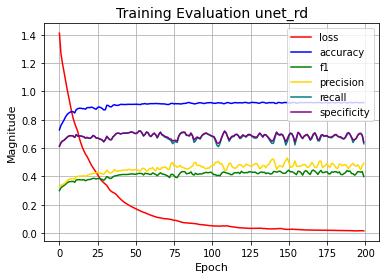

In [4]:
plt.plot(cmd.losses, label='loss', color='red')
plt.plot(cmd.accuracies, label='accuracy', color='blue')
plt.plot(cmd.f1s, label='f1', color='green')
plt.plot(cmd.precisions, label='precision', color='gold')
plt.plot(cmd.recalls, label='recall', color='teal')
plt.plot(cmd.specificities, label='specificity', color='purple')
plt.title('Training Evaluation {}'.format(model_type), fontsize=14)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Magnitude', fontsize=11)
plt.grid(True)
plt.legend()
plt.show()

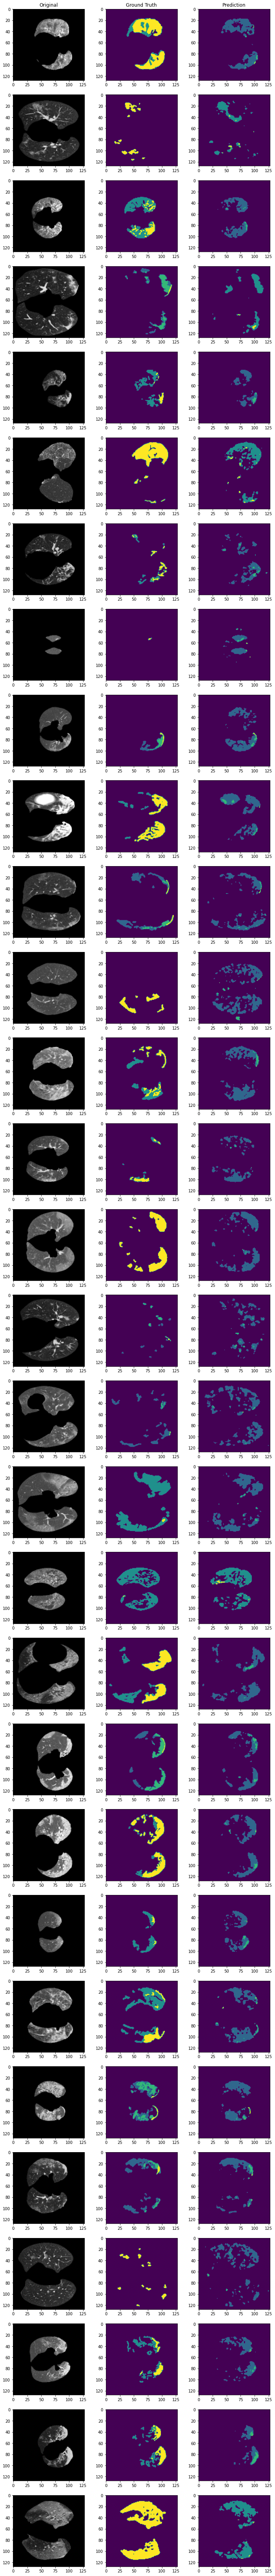

In [5]:
images = sorted(glob.glob("{}/*".format(test_images_dir)))
masks  = sorted(glob.glob("{}/*".format(test_masks_dir)))

dim = (img_width, img_height)

num_images = len(images)
num_cols   = 3

col_names = [
    "Original",
    "Ground Truth",
    "Prediction"
]

fig, axes = plt.subplots(nrows=num_images, ncols=num_cols, figsize=(num_cols*4, num_images*4))

for ax, col in zip(axes[0], col_names):
    ax.set_title(col)
    
counter = 0

scores = []

for i in range(num_images):
    image_file = images[i]
    mask_file  = masks[i]
    
    img  = get_image(image_file, dim)
    mask = get_mask(mask_file, dim)
    
    prediction = get_predicted_img(img, model)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(img)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(mask)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(prediction)
    
    mask_vectorized = mask.ravel().astype(int)
    prediction_vectorized = prediction.ravel().astype(int)
    
    macro_score = jaccard_score(mask_vectorized, prediction_vectorized, average='macro')
    label_score = jaccard_score(mask_vectorized, prediction_vectorized, average=None)
    
    label_specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3], average=None, zero_division=1)
    label_recall      = recall_score(mask_vectorized, prediction_vectorized, average=None, zero_division=1)
    
    f1          = f1_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    accuracy    = accuracy_score(mask_vectorized, prediction_vectorized)
    precision   = precision_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    recall      = recall_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1) # sensitivity
    specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3], average='macro', zero_division=1)
    
    jaccard_score_0 = None
    jaccard_score_1 = None
    jaccard_score_2 = None
    jaccard_score_3 = None
    
    specificity_0 = None
    specificity_1 = None
    specificity_2 = None
    specificity_3 = None
    
    recall_0 = None
    recall_1 = None
    recall_2 = None
    recall_3 = None
    
    dice_0 = dice_score(mask_vectorized, prediction_vectorized, k=0)
    dice_1 = dice_score(mask_vectorized, prediction_vectorized, k=1)
    dice_2 = dice_score(mask_vectorized, prediction_vectorized, k=2)
    dice_3 = dice_score(mask_vectorized, prediction_vectorized, k=3)
    
    for i in range(len(label_score)):
        if i == 0:
            jaccard_score_0 = label_score[i]
        elif i == 1:
            jaccard_score_1 = label_score[i]
        elif i == 2:
            jaccard_score_2 = label_score[i]
        elif i == 3:
            jaccard_score_3 = label_score[i]
            
    for i in range(len(label_specificity)):
        if i == 0:
            specificity_0    = label_specificity[i]
        elif i == 1:
            specificity_1    = label_specificity[i]
        elif i == 2:
            specificity_2    = label_specificity[i]
        elif i == 3:
            specificity_3    = label_specificity[i]
            
    for i in range(len(label_recall)):
        if i == 0:
            recall_0 = label_recall[i]
        elif i == 1:
            recall_1 = label_recall[i]
        elif i == 2:
            recall_2 = label_recall[i]
        elif i == 3:
            recall_3 = label_recall[i]
        
    
    
    scores.append({
        'image_file':  image_file,
        'mask_file':   mask_file,
        'jaccard_score': macro_score,
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'precision': precision,
        'specificity': specificity,
        'jaccard_score_0': jaccard_score_0,
        'jaccard_score_1': jaccard_score_1,
        'jaccard_score_2': jaccard_score_2,
        'jaccard_score_3': jaccard_score_3,
        'specificity_0': specificity_0,
        'specificity_1': specificity_1,
        'specificity_2': specificity_2,
        'specificity_3': specificity_3,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'recall_2': recall_2,
        'recall_3': recall_3,
        'dice_0': dice_0,
        'dice_1': dice_1,
        'dice_2': dice_2,
        'dice_3': dice_3,
    })

plt.show()

In [6]:
df_scores = pd.DataFrame(scores)

df_scores

,image_file,mask_file,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,...,specificity_2,specificity_3,recall_0,recall_1,recall_2,recall_3,dice_0,dice_1,dice_2,dice_3
0,./tmp/test/images/i001.png,./tmp/test/masks/i001.tiff,0.260181,0.289059,0.864075,0.392528,0.573085,0.573085,0.939743,0.088367,...,0.012768,1.000000,0.994089,0.285484,0.012768,1.000000,0.414273,0.977198,0.018103,0.005918
1,./tmp/test/images/i005.png,./tmp/test/masks/i005.tiff,0.405821,0.464179,0.955872,0.440524,0.838575,0.878931,0.955326,0.262136,...,1.000000,1.000000,0.967192,0.548533,1.000000,NaN,0.316294,0.388179,0.003195,0.000000
2,./tmp/test/images/i010.png,./tmp/test/masks/i010.tiff,0.362826,0.430742,0.932129,0.598475,0.653890,0.653890,0.949467,0.411331,...,0.092760,1.000000,0.995949,0.526851,0.092760,1.000000,0.449742,0.797243,0.051694,0.000574
3,./tmp/test/images/i011.png,./tmp/test/masks/i011.tiff,0.288880,0.331093,0.936340,0.745470,0.351564,0.351564,0.963502,0.145422,...,0.047101,0.000000,0.985882,0.373272,0.047101,0.000000,0.358386,0.883703,0.041139,0.000000
4,./tmp/test/images/i013.png,./tmp/test/masks/i013.tiff,0.449612,0.537772,0.968567,0.618556,0.744839,0.744839,0.971398,0.470462,...,0.389831,1.000000,0.990344,0.599179,0.389831,1.000000,0.367015,0.645761,0.109175,0.001161
5,./tmp/test/images/i016.png,./tmp/test/masks/i016.tiff,0.337338,0.373277,0.874146,0.543884,0.471512,0.603634,0.930933,0.048843,...,0.032878,1.000000,0.973056,0.408602,0.032878,NaN,0.483884,0.828492,0.044568,0.000000
6,./tmp/test/images/i019.png,./tmp/test/masks/i019.tiff,0.327078,0.394315,0.947327,0.435221,0.684129,0.684129,0.954804,0.190083,...,0.190909,1.000000,0.965167,0.580442,0.190909,1.000000,0.246731,0.507106,0.101194,0.005685
7,./tmp/test/images/i023.png,./tmp/test/masks/i023.tiff,0.294181,0.333516,0.969543,0.301767,0.881327,0.881327,0.969753,0.010893,...,1.000000,1.000000,0.969753,0.555556,1.000000,1.000000,0.000000,0.016393,0.078689,0.000000
8,./tmp/test/images/i027.png,./tmp/test/masks/i027.tiff,0.399159,0.508379,0.932495,0.678723,0.579591,0.579591,0.939454,0.141494,...,0.246753,0.305556,0.941983,0.824074,0.246753,0.305556,0.050898,0.437126,0.107784,0.034930
9,./tmp/test/images/i031.png,./tmp/test/masks/i031.tiff,0.243012,0.271221,0.863281,0.334794,0.537134,0.537134,0.900925,0.045480,...,0.026983,1.000000,0.955920,0.165631,0.026983,1.000000,0.619016,0.655533,0.029392,0.000445


In [7]:
df_scores.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,jaccard_score_2,jaccard_score_3,...,specificity_2,specificity_3,recall_0,recall_1,recall_2,recall_3,dice_0,dice_1,dice_2,dice_3
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,26.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,26.000000,30.000000,30.000000,30.000000,30.000000
mean,0.339220,0.399990,0.920300,0.493536,0.631290,0.642237,0.936316,0.249126,0.089996,0.028879,...,0.308355,0.759748,0.965998,0.534846,0.308355,0.722786,0.310499,0.615128,0.057206,0.004587
std,0.065173,0.081745,0.032126,0.139107,0.161101,0.160898,0.026469,0.160245,0.094940,0.073048,...,0.372399,0.409080,0.025707,0.149628,0.372399,0.428329,0.152857,0.228435,0.054154,0.008063
min,0.243012,0.271221,0.863281,0.275757,0.351564,0.351564,0.876780,0.010893,0.000000,0.000000,...,0.000000,0.000000,0.887372,0.165631,0.000000,0.000000,0.000000,0.016393,0.000000,0.000000
25%,0.287923,0.332705,0.894592,0.399394,0.486224,0.546122,0.916796,0.133845,0.015871,0.000000,...,0.048017,0.479167,0.958275,0.433014,0.048017,0.236225,0.208832,0.515122,0.017987,0.000000
50%,0.338155,0.402614,0.931885,0.491678,0.626024,0.648632,0.944764,0.215479,0.048165,0.000000,...,0.127993,1.000000,0.969780,0.566798,0.127993,1.000000,0.325615,0.657094,0.048725,0.001486
75%,0.379243,0.457429,0.945160,0.591928,0.742049,0.742049,0.955195,0.346806,0.159471,0.000000,...,0.370498,1.000000,0.984572,0.610188,0.370498,1.000000,0.427515,0.778015,0.075443,0.005574
max,0.477811,0.546045,0.969543,0.780245,0.931948,0.931948,0.971398,0.576375,0.356589,0.297297,...,1.000000,1.000000,0.995949,0.824074,1.000000,1.000000,0.619016,0.977198,0.243112,0.034930


In [8]:
df_scores.describe().to_csv("{}-scores-covid19.csv".format(model_type))

In [9]:
model_type     = 'unet'

params = {
    'img_height':     img_height,
    'img_width':      img_width,
    'device':         device,
    'gpu_index':      gpu_index,
    'input_img_dir':  input_img_dir,
    'input_mask_dir': input_mask_dir,
    'epochs':         epochs,
    'learning_rate':  learning_rate,
    'in_channels':    in_channels,
    'out_channels':   out_channels,
    'loss_type':      loss_type,
    'batch_size':     batch_size,
    'model_file':     model_file,
    'test_img_dir':   test_images_dir,
    'test_mask_dir':  test_masks_dir,
    'model_type':     model_type
}

cmd = Train(params=params)

cmd.execute()

model = cmd.model

num_parameters = count_parameters(model)

print("Number of Parameters: {}".format(num_parameters))

Training model...
input_img_dir: ./tmp/train/images/
input_mask_dir: ./tmp/train/masks/
CUDA Device: NVIDIA GeForce RTX 3050 Laptop GPU
UNet(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, a

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.97it/s, loss=1.29]


Ave Loss: 1.3380642235279083
Ave Accuracy: 0.67003173828125
Ave F1: 0.27619527842420966
Ave Precision: 0.30026940101157495
Ave Recall: 0.5681628174903693
Ave Specificity: 0.5681628174903693
Saving model to test.pth...
Epoch: 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.19it/s, loss=1.2]


Ave Loss: 1.2195638318856556
Ave Accuracy: 0.797406005859375
Ave F1: 0.3356997363401511
Ave Precision: 0.34558774756361166
Ave Recall: 0.6444264566733333
Ave Specificity: 0.6444264566733333
Saving model to test.pth...
Epoch: 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.05it/s, loss=1.13]


Ave Loss: 1.1368251542250316
Ave Accuracy: 0.8227640787760416
Ave F1: 0.3442666322119004
Ave Precision: 0.35440386942330365
Ave Recall: 0.6650984387601765
Ave Specificity: 0.6650984387601765
Saving model to test.pth...
Epoch: 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.00it/s, loss=1.07]


Ave Loss: 1.0723693519830704
Ave Accuracy: 0.8409403483072917
Ave F1: 0.3503668026277787
Ave Precision: 0.35904870724421334
Ave Recall: 0.66974325283255
Ave Specificity: 0.66974325283255
Saving model to test.pth...
Epoch: 4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.71it/s, loss=1.02]


Ave Loss: 1.0214379007617633
Ave Accuracy: 0.85565185546875
Ave F1: 0.3557377212766414
Ave Precision: 0.3639855671770412
Ave Recall: 0.6703496573222307
Ave Specificity: 0.6703496573222307
Saving model to test.pth...
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.54it/s, loss=0.981]


Ave Loss: 0.9786162773768107
Ave Accuracy: 0.8676534016927083
Ave F1: 0.36033499166328936
Ave Precision: 0.3688296212356403
Ave Recall: 0.6732446591960414
Ave Specificity: 0.6732446591960414
Saving model to test.pth...
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.61it/s, loss=0.944]


Ave Loss: 0.9416511307160059
Ave Accuracy: 0.878509521484375
Ave F1: 0.36365504513225555
Ave Precision: 0.3735688405664365
Ave Recall: 0.6716113013385755
Ave Specificity: 0.6716113013385755
Saving model to test.pth...
Epoch: 7


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.17it/s, loss=0.91]


Ave Loss: 0.908110129336516
Ave Accuracy: 0.8875244140625
Ave F1: 0.3673135863955003
Ave Precision: 0.3792426417722734
Ave Recall: 0.6694618777215796
Ave Specificity: 0.6694618777215796
Saving model to test.pth...
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.48it/s, loss=0.878]


Ave Loss: 0.8760075295964876
Ave Accuracy: 0.8942952473958333
Ave F1: 0.3685389997683265
Ave Precision: 0.3833267191672511
Ave Recall: 0.6676424375270616
Ave Specificity: 0.6676424375270616
Saving model to test.pth...
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.32it/s, loss=0.851]


Ave Loss: 0.8444232145945231
Ave Accuracy: 0.8994181315104167
Ave F1: 0.36843627554389247
Ave Precision: 0.3871964402573404
Ave Recall: 0.663005587009908
Ave Specificity: 0.663005587009908
Saving model to test.pth...
Epoch: 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.66it/s, loss=0.83]


Ave Loss: 0.8153667449951172
Ave Accuracy: 0.902899169921875
Ave F1: 0.3640285510550894
Ave Precision: 0.3866125025503545
Ave Recall: 0.653542065654391
Ave Specificity: 0.653542065654391
Saving model to test.pth...
Epoch: 11


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.99it/s, loss=0.812]


Ave Loss: 0.7930837323268255
Ave Accuracy: 0.9040812174479167
Ave F1: 0.37069884309870277
Ave Precision: 0.3954992096927882
Ave Recall: 0.6615283551514409
Ave Specificity: 0.6615283551514409
Saving model to test.pth...
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.82it/s, loss=0.796]


Ave Loss: 0.7751948063572248
Ave Accuracy: 0.9073038736979167
Ave F1: 0.36765493890710765
Ave Precision: 0.3921209687939052
Ave Recall: 0.6554157198201216
Ave Specificity: 0.6554157198201216
Saving model to test.pth...
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.92it/s, loss=0.772]


Ave Loss: 0.7560394133130709
Ave Accuracy: 0.9075642903645833
Ave F1: 0.3622680223106331
Ave Precision: 0.389290142733747
Ave Recall: 0.6495488037966194
Ave Specificity: 0.6495488037966194
Saving model to test.pth...
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.13it/s, loss=0.757]


Ave Loss: 0.7405591507752737
Ave Accuracy: 0.9081929524739584
Ave F1: 0.3678723373966817
Ave Precision: 0.40182232946835517
Ave Recall: 0.6539387144314344
Ave Specificity: 0.6539387144314344
Saving model to test.pth...
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.73it/s, loss=0.744]


Ave Loss: 0.726521797478199
Ave Accuracy: 0.9100382486979167
Ave F1: 0.36252794747125106
Ave Precision: 0.39672016977995894
Ave Recall: 0.6438617050799006
Ave Specificity: 0.6438617050799006
Saving model to test.pth...
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.51it/s, loss=0.734]


Ave Loss: 0.7136314536134402
Ave Accuracy: 0.9069376627604167
Ave F1: 0.3694424300476083
Ave Precision: 0.40565540573721853
Ave Recall: 0.652782358210765
Ave Specificity: 0.652782358210765
Saving model to test.pth...
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.59it/s, loss=0.722]


Ave Loss: 0.7030346468091011
Ave Accuracy: 0.908892822265625
Ave F1: 0.37805370457233
Ave Precision: 0.4176847889164356
Ave Recall: 0.6618127315210882
Ave Specificity: 0.6618127315210882
Saving model to test.pth...
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.53it/s, loss=0.711]


Ave Loss: 0.6914878512422243
Ave Accuracy: 0.914385986328125
Ave F1: 0.3759394217171395
Ave Precision: 0.419129633649059
Ave Recall: 0.656767183630914
Ave Specificity: 0.656767183630914
Saving model to test.pth...
Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.40it/s, loss=0.701]


Ave Loss: 0.6808429708083471
Ave Accuracy: 0.9184611002604167
Ave F1: 0.3726183058600547
Ave Precision: 0.41711808680864754
Ave Recall: 0.6524928805745825
Ave Specificity: 0.6524928805745825
Saving model to test.pth...
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.20it/s, loss=0.693]


Ave Loss: 0.6703646878401438
Ave Accuracy: 0.91895751953125
Ave F1: 0.36632582972057237
Ave Precision: 0.4139040316965669
Ave Recall: 0.6339576236851794
Ave Specificity: 0.6352780698108013
Saving model to test.pth...
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.04it/s, loss=0.685]


Ave Loss: 0.6614000325401624
Ave Accuracy: 0.9162027994791667
Ave F1: 0.35480300006622395
Ave Precision: 0.4044805255054825
Ave Recall: 0.6180897332474731
Ave Specificity: 0.6227609321914466
Saving model to test.pth...
Epoch: 22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.72it/s, loss=0.676]


Ave Loss: 0.6528798962632815
Ave Accuracy: 0.919635009765625
Ave F1: 0.35465573148068413
Ave Precision: 0.40419959501094394
Ave Recall: 0.621365157023655
Ave Specificity: 0.621365157023655
Saving model to test.pth...
Epoch: 23


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.86it/s, loss=0.67]


Ave Loss: 0.6452413027485212
Ave Accuracy: 0.915234375
Ave F1: 0.38269929857447305
Ave Precision: 0.42125403694670177
Ave Recall: 0.6648768075234511
Ave Specificity: 0.6648768075234511
Saving model to test.pth...
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.02it/s, loss=0.662]


Ave Loss: 0.6375589370727539
Ave Accuracy: 0.908465576171875
Ave F1: 0.3986417630186883
Ave Precision: 0.4428609837391429
Ave Recall: 0.6760505657600681
Ave Specificity: 0.6780736429230859
Saving model to test.pth...
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.97it/s, loss=0.655]


Ave Loss: 0.6295173913240433
Ave Accuracy: 0.9216227213541667
Ave F1: 0.3814448499423417
Ave Precision: 0.4477481595904494
Ave Recall: 0.6449622013153917
Ave Specificity: 0.649143957910739
Saving model to test.pth...
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.96it/s, loss=0.648]


Ave Loss: 0.6211613019307455
Ave Accuracy: 0.921453857421875
Ave F1: 0.37288218805756584
Ave Precision: 0.4277131323707342
Ave Recall: 0.6318796509906875
Ave Specificity: 0.6363720926005002
Saving model to test.pth...
Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.07it/s, loss=0.642]


Ave Loss: 0.6134840399026871
Ave Accuracy: 0.9192708333333334
Ave F1: 0.3787321067338526
Ave Precision: 0.4230413573649765
Ave Recall: 0.6403541405769266
Ave Specificity: 0.649322637866446
Saving model to test.pth...
Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.97it/s, loss=0.635]


Ave Loss: 0.6063517580429713
Ave Accuracy: 0.9185139973958333
Ave F1: 0.40375372039046104
Ave Precision: 0.45395930619389707
Ave Recall: 0.6621740696633879
Ave Specificity: 0.6683254777374185
Saving model to test.pth...
Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.99it/s, loss=0.629]


Ave Loss: 0.5997251843412718
Ave Accuracy: 0.919384765625
Ave F1: 0.4093202649122327
Ave Precision: 0.4657727614238634
Ave Recall: 0.6375393482076925
Ave Specificity: 0.6525181149305069
Saving model to test.pth...
Epoch: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.04it/s, loss=0.623]


Ave Loss: 0.5938492740194002
Ave Accuracy: 0.918878173828125
Ave F1: 0.3929294432885785
Ave Precision: 0.45400197404869486
Ave Recall: 0.6371563168470051
Ave Specificity: 0.6492882252524496
Saving model to test.pth...
Epoch: 31


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.15it/s, loss=0.618]


Ave Loss: 0.5885433082779249
Ave Accuracy: 0.918218994140625
Ave F1: 0.4094262820245608
Ave Precision: 0.45787129363817514
Ave Recall: 0.6425548807579671
Ave Specificity: 0.6595092860650095
Saving model to test.pth...
Epoch: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.01it/s, loss=0.611]


Ave Loss: 0.5829658980170885
Ave Accuracy: 0.9189208984375
Ave F1: 0.4286763979792663
Ave Precision: 0.49354865344050325
Ave Recall: 0.6299892473332017
Ave Specificity: 0.6641386742278426
Saving model to test.pth...
Epoch: 33


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.89it/s, loss=0.605]


Ave Loss: 0.5772023275494576
Ave Accuracy: 0.9218973795572917
Ave F1: 0.4266603501809569
Ave Precision: 0.5166555765978312
Ave Recall: 0.6224354203488126
Ave Specificity: 0.6519538369634461
Saving model to test.pth...
Epoch: 34


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.89it/s, loss=0.6]


Ave Loss: 0.5704752951860428
Ave Accuracy: 0.9228129069010417
Ave F1: 0.43592112764721436
Ave Precision: 0.5088121039619815
Ave Recall: 0.6307353048074036
Ave Specificity: 0.6604401485911988
Saving model to test.pth...
Epoch: 35


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.99it/s, loss=0.594]


Ave Loss: 0.5639798616369566
Ave Accuracy: 0.9183817545572917
Ave F1: 0.4349724124722636
Ave Precision: 0.5040200008899258
Ave Recall: 0.6498500857668985
Ave Specificity: 0.6756580461887938
Saving model to test.pth...
Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.84it/s, loss=0.589]


Ave Loss: 0.558210700750351
Ave Accuracy: 0.91741943359375
Ave F1: 0.4355837782547738
Ave Precision: 0.5162732612478395
Ave Recall: 0.6386597416978699
Ave Specificity: 0.6680568119708463
Saving model to test.pth...
Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.13it/s, loss=0.583]


Ave Loss: 0.5526124387979507
Ave Accuracy: 0.922283935546875
Ave F1: 0.4510921499121865
Ave Precision: 0.5350819964677096
Ave Recall: 0.6164623341691972
Ave Specificity: 0.6601039886850445
Saving model to test.pth...
Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.99it/s, loss=0.578]


Ave Loss: 0.5472220480442047
Ave Accuracy: 0.9217997233072917
Ave F1: 0.4604735100467194
Ave Precision: 0.5414456383055981
Ave Recall: 0.6309637982146772
Ave Specificity: 0.6703342356755846
Saving model to test.pth...
Epoch: 39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.01it/s, loss=0.573]


Ave Loss: 0.5421372875571251
Ave Accuracy: 0.918450927734375
Ave F1: 0.45411612370845905
Ave Precision: 0.5356670248103632
Ave Recall: 0.6394027024364359
Ave Specificity: 0.6736414048551637
Saving model to test.pth...
Epoch: 40


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.08it/s, loss=0.568]


Ave Loss: 0.5367440059781075
Ave Accuracy: 0.9221048990885417
Ave F1: 0.448477052325565
Ave Precision: 0.5429247063757673
Ave Recall: 0.6446062729984818
Ave Specificity: 0.6734710979093654
Saving model to test.pth...
Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.92it/s, loss=0.564]


Ave Loss: 0.5314398345847925
Ave Accuracy: 0.9223429361979166
Ave F1: 0.47440155060721506
Ave Precision: 0.5700314558300945
Ave Recall: 0.620240748386485
Ave Specificity: 0.6706905312440999
Saving model to test.pth...
Epoch: 42


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.05it/s, loss=0.56]


Ave Loss: 0.5266327783465385
Ave Accuracy: 0.9209493001302084
Ave F1: 0.46434253354545646
Ave Precision: 0.5714684972292761
Ave Recall: 0.6105662881606939
Ave Specificity: 0.661249320638552
Saving model to test.pth...
Epoch: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.97it/s, loss=0.555]


Ave Loss: 0.5220956889291605
Ave Accuracy: 0.9229939778645834
Ave F1: 0.46751851180728593
Ave Precision: 0.5702941358053987
Ave Recall: 0.5979857477062532
Ave Specificity: 0.6568747961000011
Saving model to test.pth...
Epoch: 44


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.04it/s, loss=0.55]


Ave Loss: 0.5179012604057789
Ave Accuracy: 0.92083740234375
Ave F1: 0.466962982097942
Ave Precision: 0.5374957529189953
Ave Recall: 0.6442485279022709
Ave Specificity: 0.684153794046008
Saving model to test.pth...
Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.93it/s, loss=0.545]


Ave Loss: 0.5137613092859586
Ave Accuracy: 0.9192281087239583
Ave F1: 0.4863198243388263
Ave Precision: 0.5791475063247126
Ave Recall: 0.6416667638680198
Ave Specificity: 0.690103933035502
Saving model to test.pth...
Epoch: 46


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.92it/s, loss=0.541]


Ave Loss: 0.5078598782420158
Ave Accuracy: 0.922149658203125
Ave F1: 0.4867206442871625
Ave Precision: 0.5729057413096375
Ave Recall: 0.6154996055692
Ave Specificity: 0.674569413488538
Saving model to test.pth...
Epoch: 47


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.79it/s, loss=0.536]


Ave Loss: 0.5019513939817747
Ave Accuracy: 0.9237630208333333
Ave F1: 0.4742384906538012
Ave Precision: 0.5909979693804378
Ave Recall: 0.6106944878321141
Ave Specificity: 0.6642391311687615
Saving model to test.pth...
Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.77it/s, loss=0.531]


Ave Loss: 0.49657637253403664
Ave Accuracy: 0.922015380859375
Ave F1: 0.4794489829135429
Ave Precision: 0.5628126898828746
Ave Recall: 0.6144185583742651
Ave Specificity: 0.6711139320926743
Saving model to test.pth...
Epoch: 49


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.74it/s, loss=0.525]


Ave Loss: 0.4920951724052429
Ave Accuracy: 0.9200358072916667
Ave F1: 0.4989413536013192
Ave Precision: 0.5601688251292993
Ave Recall: 0.6314110167493171
Ave Specificity: 0.6870785850570397
Saving model to test.pth...
Epoch: 50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.04it/s, loss=0.521]


Ave Loss: 0.48788152386744815
Ave Accuracy: 0.9163472493489583
Ave F1: 0.5056591633009998
Ave Precision: 0.5877790856492419
Ave Recall: 0.6556740646895133
Ave Specificity: 0.704856544088501
Saving model to test.pth...
Epoch: 51


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.92it/s, loss=0.516]


Ave Loss: 0.48347850268085796
Ave Accuracy: 0.9220967610677083
Ave F1: 0.5097099232499597
Ave Precision: 0.5878486110599076
Ave Recall: 0.6376535894699447
Ave Specificity: 0.693343677844584
Saving model to test.pth...
Epoch: 52


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.93it/s, loss=0.514]


Ave Loss: 0.4792509600520134
Ave Accuracy: 0.9244344075520833
Ave F1: 0.4678737163434858
Ave Precision: 0.5823440919759938
Ave Recall: 0.5928290589352673
Ave Specificity: 0.6532475236479165
Saving model to test.pth...
Epoch: 53


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.95it/s, loss=0.51]


Ave Loss: 0.475209337969621
Ave Accuracy: 0.92232666015625
Ave F1: 0.4880053692667202
Ave Precision: 0.6001348222840693
Ave Recall: 0.6071396818572972
Ave Specificity: 0.6693218851552849
Saving model to test.pth...
Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.78it/s, loss=0.504]


Ave Loss: 0.47029370442032814
Ave Accuracy: 0.9225809733072917
Ave F1: 0.5203162929521096
Ave Precision: 0.6121649298109747
Ave Recall: 0.6405239262674411
Ave Specificity: 0.6986769956867552
Saving model to test.pth...
Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.60it/s, loss=0.499]


Ave Loss: 0.4660438460608323
Ave Accuracy: 0.9212992350260417
Ave F1: 0.5007401103898251
Ave Precision: 0.5723715953697361
Ave Recall: 0.647306333160584
Ave Specificity: 0.6974946674602702
Saving model to test.pth...
Epoch: 56


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.57it/s, loss=0.496]


Ave Loss: 0.46107862144708633
Ave Accuracy: 0.9210184733072917
Ave F1: 0.48488957297898033
Ave Precision: 0.5927256675660331
Ave Recall: 0.6180703543141609
Ave Specificity: 0.6746833657048875
Saving model to test.pth...
Epoch: 57


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.83it/s, loss=0.493]


Ave Loss: 0.456604549040397
Ave Accuracy: 0.9240275065104167
Ave F1: 0.4871839917117074
Ave Precision: 0.5961882078542987
Ave Recall: 0.6159608790098687
Ave Specificity: 0.6724340209303032
Saving model to test.pth...
Epoch: 58


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.51it/s, loss=0.488]


Ave Loss: 0.45191218207279843
Ave Accuracy: 0.924755859375
Ave F1: 0.49465820818154055
Ave Precision: 0.610014247765221
Ave Recall: 0.6186112520070471
Ave Specificity: 0.67591851366156
Saving model to test.pth...
Epoch: 59


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.61it/s, loss=0.483]


Ave Loss: 0.44759811957677204
Ave Accuracy: 0.9230814615885417
Ave F1: 0.49363704741407527
Ave Precision: 0.6021745754013165
Ave Recall: 0.6070099219806087
Ave Specificity: 0.6692028472292362
Saving model to test.pth...
Epoch: 60


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.85it/s, loss=0.478]


Ave Loss: 0.4434395718077819
Ave Accuracy: 0.92362060546875
Ave F1: 0.49774087481041424
Ave Precision: 0.6099017893244245
Ave Recall: 0.6123765104177098
Ave Specificity: 0.6746124376224055
Saving model to test.pth...
Epoch: 61


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.35it/s, loss=0.475]


Ave Loss: 0.4397992379963398
Ave Accuracy: 0.9242431640625
Ave F1: 0.5119580381138673
Ave Precision: 0.6174179466845324
Ave Recall: 0.6349117772699561
Ave Specificity: 0.6918688509128816
Saving model to test.pth...
Epoch: 62


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.70it/s, loss=0.471]


Ave Loss: 0.43646853292981785
Ave Accuracy: 0.9250020345052083
Ave F1: 0.4904178371620368
Ave Precision: 0.6026559989589668
Ave Recall: 0.6064868819966898
Ave Specificity: 0.6682888708827407
Saving model to test.pth...
Epoch: 63


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.87it/s, loss=0.468]


Ave Loss: 0.43282479668656987
Ave Accuracy: 0.9239095052083334
Ave F1: 0.49896465177983346
Ave Precision: 0.6169665196776966
Ave Recall: 0.5988925120042468
Ave Specificity: 0.6647600868400707
Saving model to test.pth...
Epoch: 64


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.93it/s, loss=0.463]


Ave Loss: 0.42907951896389324
Ave Accuracy: 0.924359130859375
Ave F1: 0.5152348759749291
Ave Precision: 0.6190962103510366
Ave Recall: 0.6293725806722769
Ave Specificity: 0.6894420519336512
Saving model to test.pth...
Epoch: 65


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.71it/s, loss=0.46]


Ave Loss: 0.4252752500275771
Ave Accuracy: 0.9227071126302083
Ave F1: 0.4990614164050194
Ave Precision: 0.596515515338309
Ave Recall: 0.634086077446251
Ave Specificity: 0.6878789255893526
Saving model to test.pth...
Epoch: 66


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.35it/s, loss=0.456]


Ave Loss: 0.4214971835414569
Ave Accuracy: 0.920916748046875
Ave F1: 0.49280675122606077
Ave Precision: 0.5865153838523879
Ave Recall: 0.6171632100822829
Ave Specificity: 0.6762884541350043
Saving model to test.pth...
Epoch: 67


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.78it/s, loss=0.453]


Ave Loss: 0.4179934300482273
Ave Accuracy: 0.92384033203125
Ave F1: 0.50839376342778
Ave Precision: 0.6171102252326097
Ave Recall: 0.6181328094119584
Ave Specificity: 0.680266580503168
Saving model to test.pth...
Epoch: 68


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.51it/s, loss=0.45]


Ave Loss: 0.4141953686873118
Ave Accuracy: 0.92506103515625
Ave F1: 0.5056026098316819
Ave Precision: 0.6128295615612102
Ave Recall: 0.6234528485376976
Ave Specificity: 0.6823075310257001
Saving model to test.pth...
Epoch: 69


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.39it/s, loss=0.447]


Ave Loss: 0.4106926346818606
Ave Accuracy: 0.9254353841145834
Ave F1: 0.4915609727855454
Ave Precision: 0.601358609137232
Ave Recall: 0.6029291302522999
Ave Specificity: 0.6652469575009962
Saving model to test.pth...
Epoch: 70


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.76it/s, loss=0.443]


Ave Loss: 0.4069538513819377
Ave Accuracy: 0.9221028645833333
Ave F1: 0.4978523837950471
Ave Precision: 0.5956671571066408
Ave Recall: 0.6288851498913265
Ave Specificity: 0.6847493441077496
Saving model to test.pth...
Epoch: 71


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.65it/s, loss=0.44]


Ave Loss: 0.40404535084962845
Ave Accuracy: 0.92078857421875
Ave F1: 0.5173825983537886
Ave Precision: 0.6157347585632602
Ave Recall: 0.6388850614474044
Ave Specificity: 0.697274180324792
Saving model to test.pth...
Epoch: 72


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.80it/s, loss=0.436]


Ave Loss: 0.4007332846522331
Ave Accuracy: 0.9199991861979167
Ave F1: 0.5058284739062826
Ave Precision: 0.6062079286062357
Ave Recall: 0.6304449109224392
Ave Specificity: 0.687809980679201
Saving model to test.pth...
Epoch: 73


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.88it/s, loss=0.433]


Ave Loss: 0.3972384308775266
Ave Accuracy: 0.9256062825520833
Ave F1: 0.4830819992099425
Ave Precision: 0.5887348991090702
Ave Recall: 0.5985925526963971
Ave Specificity: 0.6588560826094167
Saving model to test.pth...
Epoch: 74


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.86it/s, loss=0.429]


Ave Loss: 0.3937496530512969
Ave Accuracy: 0.9273356119791667
Ave F1: 0.4967285276780459
Ave Precision: 0.6195763737111153
Ave Recall: 0.5993431245359001
Ave Specificity: 0.664627336898607
Saving model to test.pth...
Epoch: 75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.20it/s, loss=0.425]


Ave Loss: 0.38972392057379085
Ave Accuracy: 0.9242513020833333
Ave F1: 0.5069004570252661
Ave Precision: 0.613885262702544
Ave Recall: 0.6170759579997943
Ave Specificity: 0.6794118779992413
Saving model to test.pth...
Epoch: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.63it/s, loss=0.422]


Ave Loss: 0.3865596043566863
Ave Accuracy: 0.9210693359375
Ave F1: 0.5105613461446606
Ave Precision: 0.606239919259074
Ave Recall: 0.6333878900156463
Ave Specificity: 0.6930970065612047
Saving model to test.pth...
Epoch: 77


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.63it/s, loss=0.419]


Ave Loss: 0.38302193582057953
Ave Accuracy: 0.92559814453125
Ave F1: 0.49827811518206805
Ave Precision: 0.6053278499113717
Ave Recall: 0.6119665542520693
Ave Specificity: 0.6731060849856346
Saving model to test.pth...
Epoch: 78


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.87it/s, loss=0.416]


Ave Loss: 0.37963053832451504
Ave Accuracy: 0.925726318359375
Ave F1: 0.5035745240284805
Ave Precision: 0.6246568246569644
Ave Recall: 0.6022411762499134
Ave Specificity: 0.6676427681118189
Saving model to test.pth...
Epoch: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.81it/s, loss=0.412]


Ave Loss: 0.37642544880509377
Ave Accuracy: 0.92408447265625
Ave F1: 0.49176466615176256
Ave Precision: 0.6130615478143905
Ave Recall: 0.6059535482456225
Ave Specificity: 0.670288536322476
Saving model to test.pth...
Epoch: 80


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.68it/s, loss=0.409]


Ave Loss: 0.37295619150002796
Ave Accuracy: 0.9223002115885417
Ave F1: 0.4933295045882638
Ave Precision: 0.6102523822106569
Ave Recall: 0.61268744811532
Ave Specificity: 0.6753097703867421
Saving model to test.pth...
Epoch: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.62it/s, loss=0.406]


Ave Loss: 0.3698646364112695
Ave Accuracy: 0.9245015462239583
Ave F1: 0.508889658618026
Ave Precision: 0.6133127686866559
Ave Recall: 0.6260784703731482
Ave Specificity: 0.6846328521439212
Saving model to test.pth...
Epoch: 82


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.84it/s, loss=0.402]


Ave Loss: 0.3662441199024518
Ave Accuracy: 0.925164794921875
Ave F1: 0.508048628275969
Ave Precision: 0.608302560492762
Ave Recall: 0.6246724184762003
Ave Specificity: 0.6836651352038451
Saving model to test.pth...
Epoch: 83


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.01it/s, loss=0.399]


Ave Loss: 0.3631894166270892
Ave Accuracy: 0.9232096354166667
Ave F1: 0.4955828297629862
Ave Precision: 0.602124926980631
Ave Recall: 0.6169429684446103
Ave Specificity: 0.6770990474788116
Saving model to test.pth...
Epoch: 84


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.62it/s, loss=0.396]


Ave Loss: 0.3598991669714451
Ave Accuracy: 0.9223164876302083
Ave F1: 0.5017361913177029
Ave Precision: 0.6217693530277565
Ave Recall: 0.6185039353577333
Ave Specificity: 0.6807922571258113
Saving model to test.pth...
Epoch: 85


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.62it/s, loss=0.393]


Ave Loss: 0.3570490988592307
Ave Accuracy: 0.9257283528645833
Ave F1: 0.4882786029895836
Ave Precision: 0.6245969923149777
Ave Recall: 0.5955827315125763
Ave Specificity: 0.6612668307723395
Saving model to test.pth...
Epoch: 86


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.54it/s, loss=0.389]


Ave Loss: 0.3540108973781268
Ave Accuracy: 0.9245930989583333
Ave F1: 0.4993486438605228
Ave Precision: 0.6051648115032392
Ave Recall: 0.6142770211549403
Ave Specificity: 0.67671872506066
Saving model to test.pth...
Epoch: 87


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.83it/s, loss=0.386]


Ave Loss: 0.35079777613282204
Ave Accuracy: 0.9200358072916667
Ave F1: 0.5265857767155452
Ave Precision: 0.610855455300053
Ave Recall: 0.655997378490596
Ave Specificity: 0.7110376004050897
Saving model to test.pth...
Epoch: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.03it/s, loss=0.383]


Ave Loss: 0.34806301568945247
Ave Accuracy: 0.9262552897135417
Ave F1: 0.5150987807238598
Ave Precision: 0.6248384637347633
Ave Recall: 0.6249448162394666
Ave Specificity: 0.685821284181044
Saving model to test.pth...
Epoch: 89


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.81it/s, loss=0.382]


Ave Loss: 0.3452286683022976
Ave Accuracy: 0.9267822265625
Ave F1: 0.48055256963210236
Ave Precision: 0.6109776800731834
Ave Recall: 0.5810755417334721
Ave Specificity: 0.6495219608266548
Saving model to test.pth...
Epoch: 90


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.94it/s, loss=0.378]


Ave Loss: 0.3424341244002183
Ave Accuracy: 0.9240743001302083
Ave F1: 0.490748627310802
Ave Precision: 0.6179668473479246
Ave Recall: 0.602825432673
Ave Specificity: 0.6680470791462693
Saving model to test.pth...
Epoch: 91


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.78it/s, loss=0.376]


Ave Loss: 0.3395454001923402
Ave Accuracy: 0.9201334635416667
Ave F1: 0.5095656279045742
Ave Precision: 0.6195271695282087
Ave Recall: 0.6362102991287112
Ave Specificity: 0.6922548625874876
Saving model to test.pth...
Epoch: 92


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.71it/s, loss=0.373]


Ave Loss: 0.33690375337998074
Ave Accuracy: 0.9248779296875
Ave F1: 0.49834131289776
Ave Precision: 0.6064830582462022
Ave Recall: 0.6107102380810875
Ave Specificity: 0.6737456991897685
Saving model to test.pth...
Epoch: 93


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.39it/s, loss=0.37]


Ave Loss: 0.3338575561841329
Ave Accuracy: 0.9260294596354167
Ave F1: 0.4946415984705424
Ave Precision: 0.6155798661089558
Ave Recall: 0.5932120278351424
Ave Specificity: 0.6603883358384262
Saving model to test.pth...
Epoch: 94


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.92it/s, loss=0.367]


Ave Loss: 0.3310205178956191
Ave Accuracy: 0.9250996907552084
Ave F1: 0.5150754882270826
Ave Precision: 0.6236373887879915
Ave Recall: 0.6237991944828021
Ave Specificity: 0.6850896337554546
Saving model to test.pth...
Epoch: 95


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.84it/s, loss=0.364]


Ave Loss: 0.3284907341003418
Ave Accuracy: 0.9221415201822917
Ave F1: 0.496039479041465
Ave Precision: 0.609532397512034
Ave Recall: 0.6263757089174982
Ave Specificity: 0.6841491457502464
Saving model to test.pth...
Epoch: 96


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.66it/s, loss=0.361]


Ave Loss: 0.3256467791895072
Ave Accuracy: 0.9234720865885416
Ave F1: 0.48519673406538283
Ave Precision: 0.6030793267446313
Ave Recall: 0.5952153238489479
Ave Specificity: 0.6612898188846755
Saving model to test.pth...
Epoch: 97


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.87it/s, loss=0.358]


Ave Loss: 0.32278210297226906
Ave Accuracy: 0.92587890625
Ave F1: 0.4976265879524126
Ave Precision: 0.6285145619718892
Ave Recall: 0.6035365199681636
Ave Specificity: 0.6683762943256059
Saving model to test.pth...
Epoch: 98


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.51it/s, loss=0.355]


Ave Loss: 0.32028071333964664
Ave Accuracy: 0.9218546549479166
Ave F1: 0.5210620979522284
Ave Precision: 0.6146805159804152
Ave Recall: 0.644910314884401
Ave Specificity: 0.7021233142959578
Saving model to test.pth...
Epoch: 99


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.77it/s, loss=0.352]


Ave Loss: 0.3175176667670409
Ave Accuracy: 0.9247456868489583
Ave F1: 0.5115688241998325
Ave Precision: 0.610619763038439
Ave Recall: 0.6278027850428409
Ave Specificity: 0.6878096997294969
Saving model to test.pth...
Epoch: 100


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.90it/s, loss=0.351]


Ave Loss: 0.3148437129954497
Ave Accuracy: 0.926666259765625
Ave F1: 0.5000314637475207
Ave Precision: 0.6193148369939177
Ave Recall: 0.6067280144576765
Ave Specificity: 0.6705943089753171
Saving model to test.pth...
Epoch: 101


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.07it/s, loss=0.347]


Ave Loss: 0.3118034563958645
Ave Accuracy: 0.92347412109375
Ave F1: 0.5030526141375224
Ave Precision: 0.6233220563574825
Ave Recall: 0.6197984577368116
Ave Specificity: 0.6815095832064734
Saving model to test.pth...
Epoch: 102


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.93it/s, loss=0.344]


Ave Loss: 0.3091517773767312
Ave Accuracy: 0.9232889811197916
Ave F1: 0.4893527182199056
Ave Precision: 0.6160276882043171
Ave Recall: 0.6069489311128478
Ave Specificity: 0.670207542454699
Saving model to test.pth...
Epoch: 103


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 12.00it/s, loss=0.341]


Ave Loss: 0.3064042404294014
Ave Accuracy: 0.9263448079427083
Ave F1: 0.5109331109240713
Ave Precision: 0.6195018695423017
Ave Recall: 0.615604402242674
Ave Specificity: 0.6784852788364453
Saving model to test.pth...
Epoch: 104


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.56it/s, loss=0.339]


Ave Loss: 0.30367061744133633
Ave Accuracy: 0.92615966796875
Ave F1: 0.523237988934285
Ave Precision: 0.6234595342758698
Ave Recall: 0.6340077924961938
Ave Specificity: 0.6932724981982384
Saving model to test.pth...
Epoch: 105


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.63it/s, loss=0.336]


Ave Loss: 0.3011876841386159
Ave Accuracy: 0.9233846028645833
Ave F1: 0.49392780028874245
Ave Precision: 0.6096334929513125
Ave Recall: 0.6185501227895338
Ave Specificity: 0.6771265012685413
Saving model to test.pth...
Epoch: 106


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.78it/s, loss=0.334]


Ave Loss: 0.29891103754440945
Ave Accuracy: 0.9249308268229167
Ave F1: 0.49018624596078614
Ave Precision: 0.6331699985397428
Ave Recall: 0.600313425955875
Ave Specificity: 0.6652479007694122
Saving model to test.pth...
Epoch: 107


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.93it/s, loss=0.332]


Ave Loss: 0.2964656539261341
Ave Accuracy: 0.9254313151041667
Ave F1: 0.5044901238613931
Ave Precision: 0.6298709544897697
Ave Recall: 0.6129005994179507
Ave Specificity: 0.67607751419127
Saving model to test.pth...
Epoch: 108


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.62it/s, loss=0.328]


Ave Loss: 0.29397300630807877
Ave Accuracy: 0.9243408203125
Ave F1: 0.5162475268143899
Ave Precision: 0.6126626005044301
Ave Recall: 0.6357302711639967
Ave Specificity: 0.6944248184893704
Saving model to test.pth...
Epoch: 109


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.98it/s, loss=0.327]


Ave Loss: 0.29153456911444664
Ave Accuracy: 0.9240926106770834
Ave F1: 0.5157136871507716
Ave Precision: 0.6219467087873326
Ave Recall: 0.6279048463159086
Ave Specificity: 0.6885071069272075
Saving model to test.pth...
Epoch: 110


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.85it/s, loss=0.324]


Ave Loss: 0.28906594837705296
Ave Accuracy: 0.9259134928385416
Ave F1: 0.48932974660308104
Ave Precision: 0.6312709641286501
Ave Recall: 0.5933368742489299
Ave Specificity: 0.6599724324469272
Saving model to test.pth...
Epoch: 111


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.47it/s, loss=0.321]


Ave Loss: 0.2863840274512768
Ave Accuracy: 0.9253031412760416
Ave F1: 0.4981623192130536
Ave Precision: 0.6269641296376144
Ave Recall: 0.616673773903928
Ave Specificity: 0.678262410337027
Saving model to test.pth...
Epoch: 112


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.88it/s, loss=0.318]


Ave Loss: 0.283753019447128
Ave Accuracy: 0.9232320149739583
Ave F1: 0.5215769431740297
Ave Precision: 0.6187933364523457
Ave Recall: 0.6480949610703404
Ave Specificity: 0.7044564777083898
Saving model to test.pth...
Epoch: 113


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.83it/s, loss=0.315]


Ave Loss: 0.28125206505258876
Ave Accuracy: 0.9244466145833333
Ave F1: 0.5090858161051153
Ave Precision: 0.6189910767141005
Ave Recall: 0.6204936161344797
Ave Specificity: 0.6825756916397242
Saving model to test.pth...
Epoch: 114


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.58it/s, loss=0.314]


Ave Loss: 0.27877218772967655
Ave Accuracy: 0.9271484375
Ave F1: 0.5000549673722353
Ave Precision: 0.6308540834713803
Ave Recall: 0.6059475388783108
Ave Specificity: 0.66994052716265
Saving model to test.pth...
Epoch: 115


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.89it/s, loss=0.311]


Ave Loss: 0.27650848403573036
Ave Accuracy: 0.9252461751302083
Ave F1: 0.5057785843488503
Ave Precision: 0.6271745707640536
Ave Recall: 0.6217601715511623
Ave Specificity: 0.6831384160922384
Saving model to test.pth...
Epoch: 116


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.93it/s, loss=0.308]


Ave Loss: 0.2740563799937566
Ave Accuracy: 0.9221333821614583
Ave F1: 0.5085568934607128
Ave Precision: 0.6181509731290996
Ave Recall: 0.6267346807510032
Ave Specificity: 0.6869875447824135
Saving model to test.pth...
Epoch: 117


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.96it/s, loss=0.307]


Ave Loss: 0.2717806665847699
Ave Accuracy: 0.926678466796875
Ave F1: 0.5134939233005675
Ave Precision: 0.6251346469077169
Ave Recall: 0.6303670519260919
Ave Specificity: 0.6900168123109911
Saving model to test.pth...
Epoch: 118


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.78it/s, loss=0.304]


Ave Loss: 0.26944417506456375
Ave Accuracy: 0.92618408203125
Ave F1: 0.5054534172991794
Ave Precision: 0.6257514194290646
Ave Recall: 0.6142165263379787
Ave Specificity: 0.6769990636539696
Saving model to test.pth...
Epoch: 119


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.96it/s, loss=0.302]


Ave Loss: 0.2673295351366202
Ave Accuracy: 0.923748779296875
Ave F1: 0.49994886164280666
Ave Precision: 0.6174306008331985
Ave Recall: 0.6167939492717257
Ave Specificity: 0.6789470529578773
Saving model to test.pth...
Epoch: 120


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.89it/s, loss=0.299]


Ave Loss: 0.26506228372454643
Ave Accuracy: 0.9249287923177083
Ave F1: 0.5086208010781555
Ave Precision: 0.6232520521684395
Ave Recall: 0.6272458896732578
Ave Specificity: 0.6871518467429619
Saving model to test.pth...
Epoch: 121


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.79it/s, loss=0.297]


Ave Loss: 0.26292125073572
Ave Accuracy: 0.925372314453125
Ave F1: 0.5120261666158928
Ave Precision: 0.6248848918461009
Ave Recall: 0.6232448989503314
Ave Specificity: 0.6845428227397009
Saving model to test.pth...
Epoch: 122


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.85it/s, loss=0.295]


Ave Loss: 0.2607017724464337
Ave Accuracy: 0.9257242838541667
Ave F1: 0.504047287434875
Ave Precision: 0.628826111530266
Ave Recall: 0.6065769000278523
Ave Specificity: 0.6712283302878205
Saving model to test.pth...
Epoch: 123


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.76it/s, loss=0.292]


Ave Loss: 0.25869425758719444
Ave Accuracy: 0.926092529296875
Ave F1: 0.5055684567787478
Ave Precision: 0.6183293656736742
Ave Recall: 0.6242902509841189
Ave Specificity: 0.6848042279811889
Saving model to test.pth...
Epoch: 124


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.80it/s, loss=0.29]


Ave Loss: 0.25643759593367577
Ave Accuracy: 0.9236551920572916
Ave F1: 0.5139461831968688
Ave Precision: 0.6202142570718919
Ave Recall: 0.6396636286977081
Ave Specificity: 0.6972283885795637
Saving model to test.pth...
Epoch: 125


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.86it/s, loss=0.288]


Ave Loss: 0.2541794025649627
Ave Accuracy: 0.9258402506510417
Ave F1: 0.512625893498223
Ave Precision: 0.6298216023484683
Ave Recall: 0.6209000956648276
Ave Specificity: 0.6825146116329809
Saving model to test.pth...
Epoch: 126


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.91it/s, loss=0.287]


Ave Loss: 0.25199581558505696
Ave Accuracy: 0.9261311848958333
Ave F1: 0.4934658918327652
Ave Precision: 0.6171004470751522
Ave Recall: 0.6054285133888551
Ave Specificity: 0.6691193285525265
Saving model to test.pth...
Epoch: 127


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.92it/s, loss=0.283]


Ave Loss: 0.24998031246165434
Ave Accuracy: 0.925244140625
Ave F1: 0.5125373461217626
Ave Precision: 0.6232681500875172
Ave Recall: 0.6334827927858803
Ave Specificity: 0.6922490855643059
Saving model to test.pth...
Epoch: 128


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.80it/s, loss=0.282]


Ave Loss: 0.24801912096639475
Ave Accuracy: 0.9232808430989583
Ave F1: 0.5266839091265503
Ave Precision: 0.6253935821692184
Ave Recall: 0.6461718284722487
Ave Specificity: 0.7028454556726819
Saving model to test.pth...
Epoch: 129


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.81it/s, loss=0.28]


Ave Loss: 0.24602799428006014
Ave Accuracy: 0.926446533203125
Ave F1: 0.49648677325122403
Ave Precision: 0.6175913501970939
Ave Recall: 0.602629748245544
Ave Specificity: 0.6672033926654931
Saving model to test.pth...
Epoch: 130


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.86it/s, loss=0.277]


Ave Loss: 0.2438702012101809
Ave Accuracy: 0.927435302734375
Ave F1: 0.5009017085191367
Ave Precision: 0.6203882607160114
Ave Recall: 0.6140210781196873
Ave Specificity: 0.6763665557133649
Saving model to test.pth...
Epoch: 131


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.60it/s, loss=0.276]


Ave Loss: 0.24178756152590117
Ave Accuracy: 0.9238688151041666
Ave F1: 0.5172156397797872
Ave Precision: 0.6264377944572371
Ave Recall: 0.633452227136009
Ave Specificity: 0.6922945430762522
Saving model to test.pth...
Epoch: 132


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.63it/s, loss=0.274]


Ave Loss: 0.23977015105386576
Ave Accuracy: 0.924200439453125
Ave F1: 0.5087496197731262
Ave Precision: 0.6277567500468861
Ave Recall: 0.6216011496056278
Ave Specificity: 0.6827306634558769
Saving model to test.pth...
Epoch: 133


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.77it/s, loss=0.271]


Ave Loss: 0.2378417681902647
Ave Accuracy: 0.9278849283854167
Ave F1: 0.5154052162476935
Ave Precision: 0.625692866809864
Ave Recall: 0.6229747530729469
Ave Specificity: 0.6843366913638909
Saving model to test.pth...
Epoch: 134


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.57it/s, loss=0.269]


Ave Loss: 0.23593656222025552
Ave Accuracy: 0.9261474609375
Ave F1: 0.503179549146929
Ave Precision: 0.6152563180867164
Ave Recall: 0.6241343529206781
Ave Specificity: 0.6832752702730059
Saving model to test.pth...
Epoch: 135


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.73it/s, loss=0.267]


Ave Loss: 0.2341327549268802
Ave Accuracy: 0.92440185546875
Ave F1: 0.5000069068168574
Ave Precision: 0.6207665475077301
Ave Recall: 0.6168607930998927
Ave Specificity: 0.6783987948001791
Saving model to test.pth...
Epoch: 136


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.85it/s, loss=0.265]


Ave Loss: 0.23236396598319212
Ave Accuracy: 0.9254659016927084
Ave F1: 0.5080708258069933
Ave Precision: 0.6268490256381726
Ave Recall: 0.6205031338332984
Ave Specificity: 0.6819380209179801
Saving model to test.pth...
Epoch: 137


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.82it/s, loss=0.264]


Ave Loss: 0.23091238550841808
Ave Accuracy: 0.92603759765625
Ave F1: 0.5132930151056482
Ave Precision: 0.6257384389594143
Ave Recall: 0.6178817780729416
Ave Specificity: 0.6802689805310226
Saving model to test.pth...
Epoch: 138


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.76it/s, loss=0.262]


Ave Loss: 0.22920668373505274
Ave Accuracy: 0.9258097330729167
Ave F1: 0.5125584373257398
Ave Precision: 0.6189885237218241
Ave Recall: 0.6213107125297251
Ave Specificity: 0.6830358105354677
Saving model to test.pth...
Epoch: 139


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.69it/s, loss=0.26]


Ave Loss: 0.22768666905661425
Ave Accuracy: 0.925604248046875
Ave F1: 0.5184527631565847
Ave Precision: 0.6159534785636827
Ave Recall: 0.6400358575366796
Ave Specificity: 0.6977535132526758
Saving model to test.pth...
Epoch: 140


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.66it/s, loss=0.259]


Ave Loss: 0.22583009054263434
Ave Accuracy: 0.9247049967447917
Ave F1: 0.5049405765002304
Ave Precision: 0.6309667446552649
Ave Recall: 0.6156026735736709
Ave Specificity: 0.6784884796888943
Saving model to test.pth...
Epoch: 141


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.62it/s, loss=0.258]


Ave Loss: 0.22383186221122742
Ave Accuracy: 0.924908447265625
Ave F1: 0.5047279224692306
Ave Precision: 0.6321253473122305
Ave Recall: 0.6134068888706935
Ave Specificity: 0.6760782775598322
Saving model to test.pth...
Epoch: 142


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.78it/s, loss=0.254]


Ave Loss: 0.22205953548351923
Ave Accuracy: 0.9275858561197917
Ave F1: 0.503314739422925
Ave Precision: 0.6230885910810886
Ave Recall: 0.6077101520003257
Ave Specificity: 0.6718015483416618
Saving model to test.pth...
Epoch: 143


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.72it/s, loss=0.252]


Ave Loss: 0.22018572315573692
Ave Accuracy: 0.926312255859375
Ave F1: 0.5161449770539994
Ave Precision: 0.6219210467997258
Ave Recall: 0.6290184051190427
Ave Specificity: 0.6892864889159594
Saving model to test.pth...
Epoch: 144


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.54it/s, loss=0.251]


Ave Loss: 0.21844286223252615
Ave Accuracy: 0.92208251953125
Ave F1: 0.5146866029482379
Ave Precision: 0.6232924462573816
Ave Recall: 0.6372030607621412
Ave Specificity: 0.6952250450154353
Saving model to test.pth...
Epoch: 145


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.73it/s, loss=0.249]


Ave Loss: 0.21654882406195006
Ave Accuracy: 0.926397705078125
Ave F1: 0.5105507324227173
Ave Precision: 0.6307727125760209
Ave Recall: 0.6186073124279746
Ave Specificity: 0.6805889957989557
Saving model to test.pth...
Epoch: 146


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.76it/s, loss=0.247]


Ave Loss: 0.21455796994268894
Ave Accuracy: 0.92686767578125
Ave F1: 0.4990940107430512
Ave Precision: 0.6302004295675737
Ave Recall: 0.6059316511579751
Ave Specificity: 0.6703066101704392
Saving model to test.pth...
Epoch: 147


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.65it/s, loss=0.246]


Ave Loss: 0.21307074216504893
Ave Accuracy: 0.9251220703125
Ave F1: 0.5071928143762835
Ave Precision: 0.6260793354868299
Ave Recall: 0.6265790356772576
Ave Specificity: 0.68625107411651
Saving model to test.pth...
Epoch: 148


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.73it/s, loss=0.243]


Ave Loss: 0.21113751642405987
Ave Accuracy: 0.9248067220052083
Ave F1: 0.5225381329765116
Ave Precision: 0.6270158533067195
Ave Recall: 0.6367456821226919
Ave Specificity: 0.6952474071862331
Saving model to test.pth...
Epoch: 149


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.77it/s, loss=0.241]


Ave Loss: 0.2091878472516934
Ave Accuracy: 0.9261820475260417
Ave F1: 0.5180027233447776
Ave Precision: 0.6226805211388734
Ave Recall: 0.6267375766270026
Ave Specificity: 0.6876135853822626
Saving model to test.pth...
Epoch: 150


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.81it/s, loss=0.239]


Ave Loss: 0.2072594022999207
Ave Accuracy: 0.9276204427083333
Ave F1: 0.5049213171930931
Ave Precision: 0.6263513153184724
Ave Recall: 0.6134692912310573
Ave Specificity: 0.6761005194400449
Saving model to test.pth...
Epoch: 151


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.87it/s, loss=0.237]


Ave Loss: 0.20539458530644575
Ave Accuracy: 0.9235860188802083
Ave F1: 0.5076749560011574
Ave Precision: 0.6286450278005324
Ave Recall: 0.6304142685579296
Ave Specificity: 0.6892623441185144
Saving model to test.pth...
Epoch: 152


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.90it/s, loss=0.235]


Ave Loss: 0.20379376163085303
Ave Accuracy: 0.92431640625
Ave F1: 0.5076970445090089
Ave Precision: 0.6252601045763623
Ave Recall: 0.6246393625462603
Ave Specificity: 0.6836877370086235
Saving model to test.pth...
Epoch: 153


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.64it/s, loss=0.234]


Ave Loss: 0.2020678992072741
Ave Accuracy: 0.9278076171875
Ave F1: 0.5166486572260156
Ave Precision: 0.6226353723483468
Ave Recall: 0.6195591819794684
Ave Specificity: 0.6816701462791813
Saving model to test.pth...
Epoch: 154


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.44it/s, loss=0.231]


Ave Loss: 0.2006403754154841
Ave Accuracy: 0.9268575032552083
Ave F1: 0.5134859345142074
Ave Precision: 0.6225164794156757
Ave Recall: 0.6162006809174065
Ave Specificity: 0.6789774165833313
Saving model to test.pth...
Epoch: 155


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.84it/s, loss=0.231]


Ave Loss: 0.19930216918389002
Ave Accuracy: 0.924896240234375
Ave F1: 0.508994508869059
Ave Precision: 0.6303641059094396
Ave Recall: 0.6210289760974141
Ave Specificity: 0.6826119173506666
Saving model to test.pth...
Epoch: 156


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.69it/s, loss=0.229]


Ave Loss: 0.19784953817725182
Ave Accuracy: 0.9244710286458333
Ave F1: 0.48984797939237085
Ave Precision: 0.6250326083375519
Ave Recall: 0.5963635065524232
Ave Specificity: 0.6619467222270333
Saving model to test.pth...
Epoch: 157


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.77it/s, loss=0.228]


Ave Loss: 0.19668093572060266
Ave Accuracy: 0.9262288411458334
Ave F1: 0.51401494184877
Ave Precision: 0.6278614415190434
Ave Recall: 0.6219352338303182
Ave Specificity: 0.6832313036117691
Saving model to test.pth...
Epoch: 158


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.52it/s, loss=0.226]


Ave Loss: 0.19511627592146397
Ave Accuracy: 0.923846435546875
Ave F1: 0.5236185319392187
Ave Precision: 0.6177727719517546
Ave Recall: 0.6402148758869664
Ave Specificity: 0.6983272045135035
Saving model to test.pth...
Epoch: 159


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.69it/s, loss=0.224]


Ave Loss: 0.19381051324307919
Ave Accuracy: 0.9264607747395833
Ave F1: 0.5122545803912912
Ave Precision: 0.6275385426564775
Ave Recall: 0.6166868974251845
Ave Specificity: 0.6789118382133068
Saving model to test.pth...
Epoch: 160


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.80it/s, loss=0.224]


Ave Loss: 0.19236291696627936
Ave Accuracy: 0.9277587890625
Ave F1: 0.49930987084495343
Ave Precision: 0.6349722527633099
Ave Recall: 0.6011348863058524
Ave Specificity: 0.6661768174376534
Saving model to test.pth...
Epoch: 161


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.77it/s, loss=0.223]


Ave Loss: 0.1908119979004065
Ave Accuracy: 0.9223002115885417
Ave F1: 0.5128726384249896
Ave Precision: 0.6302486175295777
Ave Recall: 0.6351307471229484
Ave Specificity: 0.693493391813729
Saving model to test.pth...
Epoch: 162


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.91it/s, loss=0.22]


Ave Loss: 0.18920793384313583
Ave Accuracy: 0.9228841145833333
Ave F1: 0.5185597616007
Ave Precision: 0.6198289776526759
Ave Recall: 0.6314921639872583
Ave Specificity: 0.6914020223281787
Saving model to test.pth...
Epoch: 163


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.65it/s, loss=0.217]


Ave Loss: 0.18768495259185633
Ave Accuracy: 0.9278055826822916
Ave F1: 0.5136224695308551
Ave Precision: 0.6208683919976223
Ave Recall: 0.6148790099692572
Ave Specificity: 0.6777656181034811
Saving model to test.pth...
Epoch: 164


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.67it/s, loss=0.218]


Ave Loss: 0.18614245330293974
Ave Accuracy: 0.9251912434895834
Ave F1: 0.5076118541512251
Ave Precision: 0.6316597610828605
Ave Recall: 0.6151735159121098
Ave Specificity: 0.677470118948669
Saving model to test.pth...
Epoch: 165


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.89it/s, loss=0.214]


Ave Loss: 0.1843591264138619
Ave Accuracy: 0.9230204264322917
Ave F1: 0.5017318517703032
Ave Precision: 0.6200399253010652
Ave Recall: 0.6245294784905305
Ave Specificity: 0.6821623457939752
Saving model to test.pth...
Epoch: 166


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.77it/s, loss=0.214]


Ave Loss: 0.18283390502134958
Ave Accuracy: 0.9273417154947917
Ave F1: 0.5115489145115528
Ave Precision: 0.6188383309003639
Ave Recall: 0.61201255700344
Ave Specificity: 0.6763249142879721
Saving model to test.pth...
Epoch: 167


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.88it/s, loss=0.211]


Ave Loss: 0.18141328853865465
Ave Accuracy: 0.926263427734375
Ave F1: 0.5168047999771962
Ave Precision: 0.626193256538171
Ave Recall: 0.6281332293700278
Ave Specificity: 0.6883732965989322
Saving model to test.pth...
Epoch: 168


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.83it/s, loss=0.21]


Ave Loss: 0.17945648233095804
Ave Accuracy: 0.9241312662760417
Ave F1: 0.5091199799869759
Ave Precision: 0.6290543338017951
Ave Recall: 0.6201957265388519
Ave Specificity: 0.6814040802046363
Saving model to test.pth...
Epoch: 169


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.84it/s, loss=0.208]


Ave Loss: 0.1777278340111176
Ave Accuracy: 0.9262471516927083
Ave F1: 0.5065401004449076
Ave Precision: 0.6191760738275973
Ave Recall: 0.6212441285984117
Ave Specificity: 0.6805444538648538
Saving model to test.pth...
Epoch: 170


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.91it/s, loss=0.206]


Ave Loss: 0.17585418994228044
Ave Accuracy: 0.9269490559895833
Ave F1: 0.5081058671334487
Ave Precision: 0.6225753359618993
Ave Recall: 0.6095046964427046
Ave Specificity: 0.6735730273639724
Saving model to test.pth...
Epoch: 171


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.89it/s, loss=0.205]


Ave Loss: 0.17434840152661005
Ave Accuracy: 0.9249532063802083
Ave F1: 0.5145391549216425
Ave Precision: 0.6294591106589789
Ave Recall: 0.6246646058188318
Ave Specificity: 0.6853372564661581
Saving model to test.pth...
Epoch: 172


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.86it/s, loss=0.203]


Ave Loss: 0.17276973028977713
Ave Accuracy: 0.9248148600260416
Ave F1: 0.5148914155818255
Ave Precision: 0.6249540212347828
Ave Recall: 0.6283547782044143
Ave Specificity: 0.6887057209791343
Saving model to test.pth...
Epoch: 173


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.80it/s, loss=0.201]


Ave Loss: 0.17119360342621803
Ave Accuracy: 0.9271158854166667
Ave F1: 0.510106570924823
Ave Precision: 0.619331179288615
Ave Recall: 0.6134464509475599
Ave Specificity: 0.6766145373852797
Saving model to test.pth...
Epoch: 174


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.88it/s, loss=0.2]


Ave Loss: 0.16980987787246704
Ave Accuracy: 0.9253275553385417
Ave F1: 0.51431352989397
Ave Precision: 0.6291617309751227
Ave Recall: 0.6239682385450462
Ave Specificity: 0.6848035930417763
Saving model to test.pth...
Epoch: 175


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.63it/s, loss=0.199]


Ave Loss: 0.16847054722408453
Ave Accuracy: 0.9262044270833333
Ave F1: 0.5134835420594395
Ave Precision: 0.6302005135730049
Ave Recall: 0.6201887578746879
Ave Specificity: 0.6819011804504564
Saving model to test.pth...
Epoch: 176


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.67it/s, loss=0.197]


Ave Loss: 0.16728160654505095
Ave Accuracy: 0.9264241536458333
Ave F1: 0.5101345148861481
Ave Precision: 0.622009398314409
Ave Recall: 0.6166394223069874
Ave Specificity: 0.6792132426125453
Saving model to test.pth...
Epoch: 177


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.73it/s, loss=0.195]


Ave Loss: 0.16613991310199103
Ave Accuracy: 0.923748779296875
Ave F1: 0.5181425172276971
Ave Precision: 0.6226281733949333
Ave Recall: 0.6310324900902803
Ave Specificity: 0.6907805933449576
Saving model to test.pth...
Epoch: 178


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.44it/s, loss=0.195]


Ave Loss: 0.16502454814811549
Ave Accuracy: 0.9282511393229167
Ave F1: 0.5073304872404758
Ave Precision: 0.6308345753685495
Ave Recall: 0.6031587956258683
Ave Specificity: 0.6682397401956841
Saving model to test.pth...
Epoch: 179


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.81it/s, loss=0.194]


Ave Loss: 0.16382346240182719
Ave Accuracy: 0.9268758138020833
Ave F1: 0.507145512444482
Ave Precision: 0.6289908667932593
Ave Recall: 0.6122242766283584
Ave Specificity: 0.6751892385583788
Saving model to test.pth...
Epoch: 180


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.94it/s, loss=0.193]


Ave Loss: 0.16261789885660013
Ave Accuracy: 0.924566650390625
Ave F1: 0.5155139782391363
Ave Precision: 0.6276277641054209
Ave Recall: 0.6268085419857664
Ave Specificity: 0.6871912003822529
Saving model to test.pth...
Epoch: 181


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.08it/s, loss=0.191]


Ave Loss: 0.16152980054418245
Ave Accuracy: 0.9246927897135416
Ave F1: 0.5130518252013496
Ave Precision: 0.6230707469808545
Ave Recall: 0.61834781167317
Ave Specificity: 0.6807884547187933
Saving model to test.pth...
Epoch: 182


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.75it/s, loss=0.189]


Ave Loss: 0.16009722898403803
Ave Accuracy: 0.92650146484375
Ave F1: 0.5157451654313686
Ave Precision: 0.6283882692982964
Ave Recall: 0.6206348675911054
Ave Specificity: 0.6822707337860849
Saving model to test.pth...
Epoch: 183


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.85it/s, loss=0.187]


Ave Loss: 0.15872986738880476
Ave Accuracy: 0.926824951171875
Ave F1: 0.5122386798849766
Ave Precision: 0.6275279644365359
Ave Recall: 0.6148474573908269
Ave Specificity: 0.6774602014018658
Saving model to test.pth...
Epoch: 184


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.86it/s, loss=0.187]


Ave Loss: 0.15740529323617616
Ave Accuracy: 0.9237141927083333
Ave F1: 0.5138698329223464
Ave Precision: 0.6212536702750828
Ave Recall: 0.6299208864374263
Ave Specificity: 0.6897018068726806
Saving model to test.pth...
Epoch: 185


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.96it/s, loss=0.185]


Ave Loss: 0.15601075875262418
Ave Accuracy: 0.9244588216145834
Ave F1: 0.5139745329536385
Ave Precision: 0.6220178996644701
Ave Recall: 0.6324845625573604
Ave Specificity: 0.6915551744307433
Saving model to test.pth...
Epoch: 186


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.96it/s, loss=0.183]


Ave Loss: 0.1549412664026022
Ave Accuracy: 0.9256632486979167
Ave F1: 0.5196452984531855
Ave Precision: 0.6286402467634477
Ave Recall: 0.6276749784004579
Ave Specificity: 0.6881008080211484
Saving model to test.pth...
Epoch: 187


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.47it/s, loss=0.182]


Ave Loss: 0.15337390887240568
Ave Accuracy: 0.925799560546875
Ave F1: 0.514308362923625
Ave Precision: 0.6270527554595986
Ave Recall: 0.6178698551592829
Ave Specificity: 0.6801002797030165
Saving model to test.pth...
Epoch: 188


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.95it/s, loss=0.181]


Ave Loss: 0.1521915743748347
Ave Accuracy: 0.9270467122395833
Ave F1: 0.5007787782656178
Ave Precision: 0.6136683843803834
Ave Recall: 0.6105823632866313
Ave Specificity: 0.671758468659903
Saving model to test.pth...
Epoch: 189


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.95it/s, loss=0.179]


Ave Loss: 0.15094787565370402
Ave Accuracy: 0.9251220703125
Ave F1: 0.5074427353299856
Ave Precision: 0.6263517003523397
Ave Recall: 0.6144483425149867
Ave Specificity: 0.6774949412701977
Saving model to test.pth...
Epoch: 190


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.90it/s, loss=0.179]


Ave Loss: 0.14995136794944605
Ave Accuracy: 0.9257792154947917
Ave F1: 0.5162304582941111
Ave Precision: 0.6332934173142364
Ave Recall: 0.6186143816127226
Ave Specificity: 0.6807863574563301
Saving model to test.pth...
Epoch: 191


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.82it/s, loss=0.177]


Ave Loss: 0.14880045937995115
Ave Accuracy: 0.92786865234375
Ave F1: 0.5043002115841799
Ave Precision: 0.6311514494183021
Ave Recall: 0.5979752668503733
Ave Specificity: 0.6640486567581907
Saving model to test.pth...
Epoch: 192


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.92it/s, loss=0.178]


Ave Loss: 0.14768943469971418
Ave Accuracy: 0.925421142578125
Ave F1: 0.5116100763751765
Ave Precision: 0.6255758958216013
Ave Recall: 0.6157252951791311
Ave Specificity: 0.6784419001224502
Saving model to test.pth...
Epoch: 193


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.93it/s, loss=0.176]


Ave Loss: 0.14664556613812843
Ave Accuracy: 0.923870849609375
Ave F1: 0.5110048655291374
Ave Precision: 0.6178022155323931
Ave Recall: 0.6331487619074737
Ave Specificity: 0.6897300944100097
Saving model to test.pth...
Epoch: 194


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.86it/s, loss=0.173]


Ave Loss: 0.14539967694630226
Ave Accuracy: 0.9274943033854167
Ave F1: 0.5174702519933775
Ave Precision: 0.6314740156758294
Ave Recall: 0.6174226448148897
Ave Specificity: 0.679889080297569
Saving model to test.pth...
Epoch: 195


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.79it/s, loss=0.171]


Ave Loss: 0.14368574786931276
Ave Accuracy: 0.9244974772135417
Ave F1: 0.518968491150536
Ave Precision: 0.6264326003895331
Ave Recall: 0.6319549103534972
Ave Specificity: 0.6915798406375391
Saving model to test.pth...
Epoch: 196


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.92it/s, loss=0.17]


Ave Loss: 0.1423535756766796
Ave Accuracy: 0.9244242350260417
Ave F1: 0.5074369277928066
Ave Precision: 0.6171536310218017
Ave Recall: 0.6305470197799675
Ave Specificity: 0.6873873567851715
Saving model to test.pth...
Epoch: 197


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.80it/s, loss=0.169]


Ave Loss: 0.141385561786592
Ave Accuracy: 0.9245564778645833
Ave F1: 0.5184397378293258
Ave Precision: 0.6250801299095169
Ave Recall: 0.6329691072475395
Ave Specificity: 0.6920982315037362
Saving model to test.pth...
Epoch: 198


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.52it/s, loss=0.168]


Ave Loss: 0.14003489321718612
Ave Accuracy: 0.9246419270833334
Ave F1: 0.517070267423855
Ave Precision: 0.615334638534554
Ave Recall: 0.6418251086358896
Ave Specificity: 0.6972127619421794
Saving model to test.pth...
Epoch: 199


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.77it/s, loss=0.166]


Ave Loss: 0.1387563512350122
Ave Accuracy: 0.9252360026041667
Ave F1: 0.5200533588611741
Ave Precision: 0.6255788482598248
Ave Recall: 0.62824551654655
Ave Specificity: 0.6884623233653008
Saving model to test.pth...
Number of Parameters: 31037828


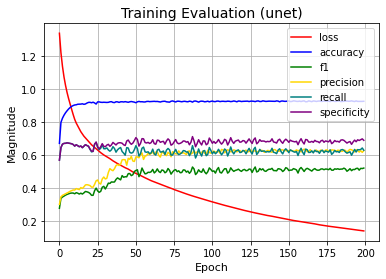

In [10]:
plt.plot(cmd.losses, label='loss', color='red')
plt.plot(cmd.accuracies, label='accuracy', color='blue')
plt.plot(cmd.f1s, label='f1', color='green')
plt.plot(cmd.precisions, label='precision', color='gold')
plt.plot(cmd.recalls, label='recall', color='teal')
plt.plot(cmd.specificities, label='specificity', color='purple')
plt.title('Training Evaluation ({})'.format(model_type), fontsize=14)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Magnitude', fontsize=11)
plt.grid(True)
plt.legend()
plt.show()

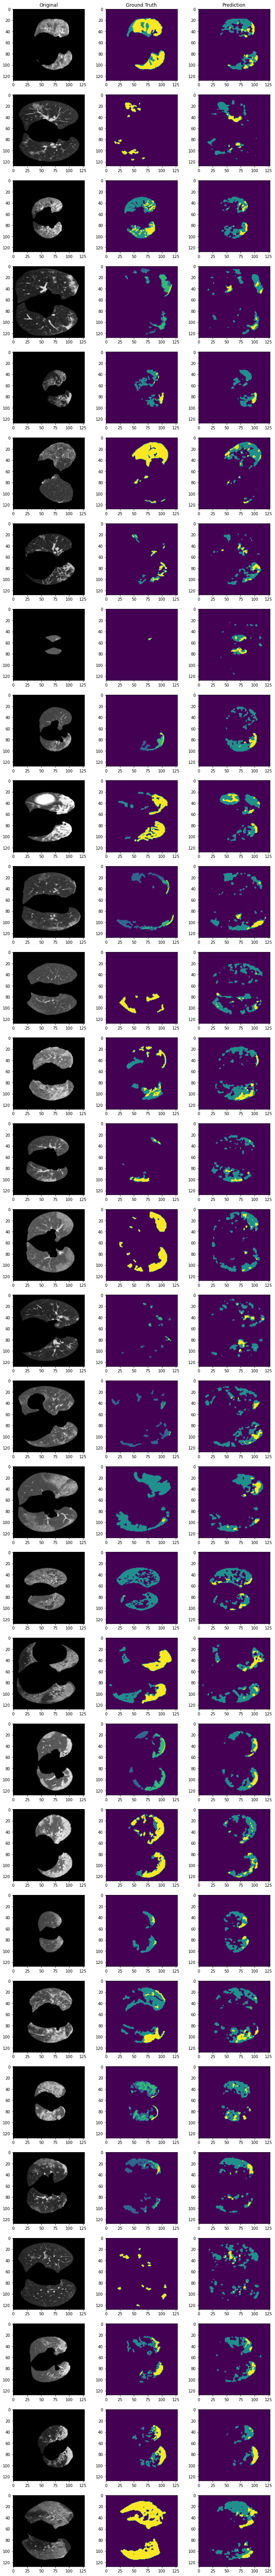

In [11]:
images = sorted(glob.glob("{}/*".format(test_images_dir)))
masks  = sorted(glob.glob("{}/*".format(test_masks_dir)))

dim = (img_width, img_height)

num_images = len(images)
num_cols   = 3

col_names = [
    "Original",
    "Ground Truth",
    "Prediction"
]

fig, axes = plt.subplots(nrows=num_images, ncols=num_cols, figsize=(num_cols*4, num_images*4))

for ax, col in zip(axes[0], col_names):
    ax.set_title(col)
    
counter = 0

scores = []

for i in range(num_images):
    image_file = images[i]
    mask_file  = masks[i]
    
    img  = get_image(image_file, dim)
    mask = get_mask(mask_file, dim)
    
    prediction = get_predicted_img(img, model)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(img)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(mask)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(prediction)
    
    mask_vectorized = mask.ravel().astype(int)
    prediction_vectorized = prediction.ravel().astype(int)
    
    macro_score = jaccard_score(mask_vectorized, prediction_vectorized, average='macro')
    label_score = jaccard_score(mask_vectorized, prediction_vectorized, average=None)
    
    label_specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3], average=None, zero_division=1)
    label_recall      = recall_score(mask_vectorized, prediction_vectorized, average=None, zero_division=1)
    
    f1          = f1_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    accuracy    = accuracy_score(mask_vectorized, prediction_vectorized)
    precision   = precision_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    recall      = recall_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1) # sensitivity
    specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3], average='macro', zero_division=1)
    
    jaccard_score_0 = None
    jaccard_score_1 = None
    jaccard_score_2 = None
    jaccard_score_3 = None
    
    specificity_0 = None
    specificity_1 = None
    specificity_2 = None
    specificity_3 = None
    
    recall_0 = None
    recall_1 = None
    recall_2 = None
    recall_3 = None
    
    dice_0 = dice_score(mask_vectorized, prediction_vectorized, k=0)
    dice_1 = dice_score(mask_vectorized, prediction_vectorized, k=1)
    dice_2 = dice_score(mask_vectorized, prediction_vectorized, k=2)
    dice_3 = dice_score(mask_vectorized, prediction_vectorized, k=3)
    
    for i in range(len(label_score)):
        if i == 0:
            jaccard_score_0 = label_score[i]
        elif i == 1:
            jaccard_score_1 = label_score[i]
        elif i == 2:
            jaccard_score_2 = label_score[i]
        elif i == 3:
            jaccard_score_3 = label_score[i]
            
    for i in range(len(label_specificity)):
        if i == 0:
            specificity_0    = label_specificity[i]
        elif i == 1:
            specificity_1    = label_specificity[i]
        elif i == 2:
            specificity_2    = label_specificity[i]
        elif i == 3:
            specificity_3    = label_specificity[i]
            
    for i in range(len(label_recall)):
        if i == 0:
            recall_0 = label_recall[i]
        elif i == 1:
            recall_1 = label_recall[i]
        elif i == 2:
            recall_2 = label_recall[i]
        elif i == 3:
            recall_3 = label_recall[i]
        
    
    
    scores.append({
        'image_file':  image_file,
        'mask_file':   mask_file,
        'jaccard_score': macro_score,
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'precision': precision,
        'specificity': specificity,
        'jaccard_score_0': jaccard_score_0,
        'jaccard_score_1': jaccard_score_1,
        'jaccard_score_2': jaccard_score_2,
        'jaccard_score_3': jaccard_score_3,
        'specificity_0': specificity_0,
        'specificity_1': specificity_1,
        'specificity_2': specificity_2,
        'specificity_3': specificity_3,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'recall_2': recall_2,
        'recall_3': recall_3,
        'dice_0': dice_0,
        'dice_1': dice_1,
        'dice_2': dice_2,
        'dice_3': dice_3,
    })

plt.show()

In [12]:
df_scores_unet = pd.DataFrame(scores)

df_scores_unet

,image_file,mask_file,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,...,specificity_2,specificity_3,recall_0,recall_1,recall_2,recall_3,dice_0,dice_1,dice_2,dice_3
0,./tmp/test/images/i001.png,./tmp/test/masks/i001.tiff,0.406033,0.484642,0.880798,0.631830,0.504057,0.628043,0.943238,0.129619,...,0.151480,1.0,0.992949,0.367742,0.151480,NaN,0.364739,0.788465,0.179256,0.0
1,./tmp/test/images/i005.png,./tmp/test/masks/i005.tiff,0.431820,0.495753,0.951965,0.467335,0.879666,0.909749,0.951066,0.344394,...,1.000000,1.0,0.959538,0.679458,1.000000,NaN,0.177168,0.375546,0.000000,0.0
2,./tmp/test/images/i010.png,./tmp/test/masks/i010.tiff,0.558038,0.677420,0.936951,0.813674,0.611271,0.708453,0.949166,0.423100,...,0.332579,1.0,0.996155,0.505080,0.332579,NaN,0.442228,0.627321,0.183984,0.0
3,./tmp/test/images/i011.png,./tmp/test/masks/i011.tiff,0.334566,0.403823,0.936584,0.701287,0.425318,0.425318,0.960323,0.198413,...,0.206522,0.0,0.976318,0.518433,0.206522,0.0,0.216253,0.707242,0.179531,0.0
4,./tmp/test/images/i013.png,./tmp/test/masks/i013.tiff,0.646374,0.763516,0.967224,0.787537,0.743737,0.807803,0.969346,0.476721,...,0.601695,1.0,0.985195,0.644323,0.601695,NaN,0.276337,0.583377,0.164108,0.0
5,./tmp/test/images/i016.png,./tmp/test/masks/i016.tiff,0.374323,0.428966,0.895752,0.636466,0.462916,0.597187,0.948696,0.038492,...,0.137717,1.0,0.987591,0.263441,0.137717,NaN,0.426132,0.746227,0.181890,0.0
6,./tmp/test/images/i019.png,./tmp/test/masks/i019.tiff,0.486596,0.592813,0.950195,0.570135,0.666229,0.749672,0.956859,0.211517,...,0.431818,1.0,0.964347,0.602524,0.431818,NaN,0.157025,0.397727,0.227273,0.0
7,./tmp/test/images/i023.png,./tmp/test/masks/i023.tiff,0.340345,0.362179,0.965881,0.351548,0.655464,0.741598,0.966392,0.000000,...,1.000000,1.0,0.966392,0.000000,1.000000,NaN,0.000000,0.000000,0.074264,0.0
8,./tmp/test/images/i027.png,./tmp/test/masks/i027.tiff,0.392109,0.469708,0.938782,0.685637,0.613426,0.613426,0.943452,0.155157,...,0.707792,0.0,0.944987,0.800926,0.707792,0.0,0.032724,0.241578,0.333975,0.0
9,./tmp/test/images/i031.png,./tmp/test/masks/i031.tiff,0.348630,0.405830,0.865417,0.471763,0.410123,0.557592,0.899890,0.048455,...,0.113655,1.0,0.951083,0.165631,0.113655,NaN,0.524799,0.563079,0.117720,0.0


In [13]:
df_scores_unet.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,jaccard_score_2,jaccard_score_3,...,specificity_2,specificity_3,recall_0,recall_1,recall_2,recall_3,dice_0,dice_1,dice_2,dice_3
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,8.0,...,30.000000,30.000000,30.000000,30.000000,30.000000,8.0,30.000000,30.000000,30.000000,30.0
mean,0.437039,0.520012,0.925236,0.625490,0.628228,0.688445,0.940211,0.269168,0.199873,0.0,...,0.510377,0.733333,0.966794,0.543278,0.510377,0.0,0.251192,0.499339,0.169674,0.0
std,0.083790,0.104820,0.027541,0.125723,0.144073,0.145237,0.021078,0.145493,0.157805,0.0,...,0.305707,0.449776,0.020792,0.184875,0.305707,0.0,0.147148,0.179448,0.086083,0.0
min,0.291431,0.343809,0.865417,0.351548,0.410123,0.425318,0.893078,0.000000,0.000000,0.0,...,0.113655,0.000000,0.920921,0.000000,0.113655,0.0,0.000000,0.000000,0.000000,0.0
25%,0.381559,0.456593,0.900391,0.553484,0.513675,0.567491,0.924275,0.148154,0.080636,0.0,...,0.254308,0.250000,0.953197,0.440625,0.254308,0.0,0.126107,0.385913,0.120393,0.0
50%,0.426491,0.507836,0.936768,0.634148,0.606981,0.690001,0.944945,0.249174,0.182547,0.0,...,0.429371,1.000000,0.968373,0.591550,0.429371,0.0,0.248590,0.516049,0.179393,0.0
75%,0.485404,0.582249,0.941315,0.726257,0.735046,0.801284,0.955734,0.404644,0.299239,0.0,...,0.684253,1.000000,0.983759,0.665972,0.684253,0.0,0.372212,0.603606,0.211931,0.0
max,0.646374,0.763516,0.967224,0.813674,0.906304,0.929728,0.969346,0.503860,0.493056,0.0,...,1.000000,1.000000,0.996155,0.822857,1.000000,0.0,0.524799,0.788465,0.356406,0.0


In [14]:
df_scores.describe().to_csv("{}-scores-covid19.csv".format(model_type))

In [15]:
df_scores.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,jaccard_score_2,jaccard_score_3,...,specificity_2,specificity_3,recall_0,recall_1,recall_2,recall_3,dice_0,dice_1,dice_2,dice_3
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,26.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,26.000000,30.000000,30.000000,30.000000,30.000000
mean,0.339220,0.399990,0.920300,0.493536,0.631290,0.642237,0.936316,0.249126,0.089996,0.028879,...,0.308355,0.759748,0.965998,0.534846,0.308355,0.722786,0.310499,0.615128,0.057206,0.004587
std,0.065173,0.081745,0.032126,0.139107,0.161101,0.160898,0.026469,0.160245,0.094940,0.073048,...,0.372399,0.409080,0.025707,0.149628,0.372399,0.428329,0.152857,0.228435,0.054154,0.008063
min,0.243012,0.271221,0.863281,0.275757,0.351564,0.351564,0.876780,0.010893,0.000000,0.000000,...,0.000000,0.000000,0.887372,0.165631,0.000000,0.000000,0.000000,0.016393,0.000000,0.000000
25%,0.287923,0.332705,0.894592,0.399394,0.486224,0.546122,0.916796,0.133845,0.015871,0.000000,...,0.048017,0.479167,0.958275,0.433014,0.048017,0.236225,0.208832,0.515122,0.017987,0.000000
50%,0.338155,0.402614,0.931885,0.491678,0.626024,0.648632,0.944764,0.215479,0.048165,0.000000,...,0.127993,1.000000,0.969780,0.566798,0.127993,1.000000,0.325615,0.657094,0.048725,0.001486
75%,0.379243,0.457429,0.945160,0.591928,0.742049,0.742049,0.955195,0.346806,0.159471,0.000000,...,0.370498,1.000000,0.984572,0.610188,0.370498,1.000000,0.427515,0.778015,0.075443,0.005574
max,0.477811,0.546045,0.969543,0.780245,0.931948,0.931948,0.971398,0.576375,0.356589,0.297297,...,1.000000,1.000000,0.995949,0.824074,1.000000,1.000000,0.619016,0.977198,0.243112,0.034930


In [16]:
df_scores_unet.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,jaccard_score_2,jaccard_score_3,...,specificity_2,specificity_3,recall_0,recall_1,recall_2,recall_3,dice_0,dice_1,dice_2,dice_3
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,8.0,...,30.000000,30.000000,30.000000,30.000000,30.000000,8.0,30.000000,30.000000,30.000000,30.0
mean,0.437039,0.520012,0.925236,0.625490,0.628228,0.688445,0.940211,0.269168,0.199873,0.0,...,0.510377,0.733333,0.966794,0.543278,0.510377,0.0,0.251192,0.499339,0.169674,0.0
std,0.083790,0.104820,0.027541,0.125723,0.144073,0.145237,0.021078,0.145493,0.157805,0.0,...,0.305707,0.449776,0.020792,0.184875,0.305707,0.0,0.147148,0.179448,0.086083,0.0
min,0.291431,0.343809,0.865417,0.351548,0.410123,0.425318,0.893078,0.000000,0.000000,0.0,...,0.113655,0.000000,0.920921,0.000000,0.113655,0.0,0.000000,0.000000,0.000000,0.0
25%,0.381559,0.456593,0.900391,0.553484,0.513675,0.567491,0.924275,0.148154,0.080636,0.0,...,0.254308,0.250000,0.953197,0.440625,0.254308,0.0,0.126107,0.385913,0.120393,0.0
50%,0.426491,0.507836,0.936768,0.634148,0.606981,0.690001,0.944945,0.249174,0.182547,0.0,...,0.429371,1.000000,0.968373,0.591550,0.429371,0.0,0.248590,0.516049,0.179393,0.0
75%,0.485404,0.582249,0.941315,0.726257,0.735046,0.801284,0.955734,0.404644,0.299239,0.0,...,0.684253,1.000000,0.983759,0.665972,0.684253,0.0,0.372212,0.603606,0.211931,0.0
max,0.646374,0.763516,0.967224,0.813674,0.906304,0.929728,0.969346,0.503860,0.493056,0.0,...,1.000000,1.000000,0.996155,0.822857,1.000000,0.0,0.524799,0.788465,0.356406,0.0
